In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from natsort import natsorted
import scipy
from scipy.io import loadmat

root_dir = "Z:\\Rohit\\BMI_Data\\Test_vids\\"
list_dir = natsorted(os.listdir(root_dir))

sub = ['I096','I107','I110','I111','I112', 'I122', 'I116', 'I117', 'I127', 'I128', 'I154','I160', 'I161', 'I170', 'I172']

# updated list with sessions with missing RV2 data removed
robust_session = [[4,5],[3,4,6],[7,9,10,13,14],[3,4,5,8,9,10],[5,7,9],
    [4,6,8],[5,6,7,8,9],[],[8],[3,6],[8,14,16,18],[7,9,11,14],[8,9],[9],[4,5,7]];

tstart = [[0,0, 1, 6, 14, 5], [ 0, 0, 1, 6,  13, 5],
    [ 0,0,0, 44, 31, 1, 15,35,8,46,13,11,38,1],
    [ 0,0,34, 8,52, 46,21,103,20,26],
    [ 0,0,57, 7, 8, 50,42,55,9,20],
    [ 0,0,0,12, 9, 5, 11,14],
    [ 0,0,12, 60, 35, 44,2,9,19],
    [0,0,0,0,1,23,1,24,1,21],
    [0,0,0,9,56,10, 86, 20,1],
    [0,0,20,58,60,1],
    [0,0,0, 66, 12,39,2, 1, 29,14, 19, 45,17,8,  2, 61, 4, 50, 38,29, 5, 1, 15],
    [0,0,0, 9, 6, 11, 4, 45,19, 11, 6, 1, 20,43, 17,23],
    [0,0,0,44, 27, 57, 20, 4, 1,  33, 1 ],
    [0,0,0,1, 40, 1, 1, 21, 8, 5,  21,7 ],
    [0,0,0,10, 1, 17, 1, 1]]

tstop  = [[0,0, 94, 106, 114, 106],[ 0, 0, 104, 105, 114, 105],
    [ 0,0,0, 149, 91, 100, 59,138,96,139,112,33,96,93],
    [ 0,0,133, 68, 125, 86,103,151,262,109],
    [ 0,0,128,123,72, 154,139,111,60,50],
    [0,0, 0,200,120,105, 134,89],
    [0,0, 74,83,84, 80,81,103,85],
    [0,0,0,0,116,45,43,70,32,82],
    [0,0,0,109,88,82,145,101,150],
    [0,0,80,91,103,107],
    [0,0,0,109,68,61,10,50,83,127,88,101,55,80,65,117,47,159,76,90,80,35,57 ],
    [0,0,0,85,80,93,100,82,140,55,100,38,60,120,60,82],
    [0,0,0,62, 83, 75, 48, 61,141,113,35],
    [0,0,0,30,85, 78,75,69,49,80,80,40],
    [0,0,0,85,80, 57,100,46]]

def read_DLC_data(session):
    early  = {'pipe':[],'nose':[],'left':[],'right':[],'uni':[]}
    late = {'pipe':[],'nose':[],'left':[],'right':[],'uni':[]}
    data = {'pipe':[],'nose':[],'left':[],'right':[],'uni':[]}
    count = 0


    for i,dirc in enumerate(list_dir):
        if i==session:
            list_vid = natsorted(os.listdir(root_dir+'\\'+ list_dir[i]+'\Trial_vid\\'))
            list_csv = [vid for vid in list_vid if vid.endswith('.csv')]
            list_csv = natsorted(list_csv)
            for num, csv in enumerate(list_csv):
                if(num<(len(list_csv)/3)-1 or (num>2*len(list_csv)/3 and tr>10)):
                    xl_data = pd.read_csv(root_dir+'\\'+ list_dir[i]+'\Trial_vid\\'+csv,header=1)
        #             print(list(xl_data))
                    left_x = xl_data['leftforepaw'][1:]
                    left_y = xl_data['leftforepaw.1'][1:]
                    right_x = xl_data['rightforepaw'][1:]
                    right_y = xl_data['rightforepaw.1'][1:]
                    nose_x = xl_data['nose'][1:]
                    nose_y = xl_data['nose.1'][1:]
                    unicorn_x = xl_data['unicorn'][1:]
                    unicorn_y = xl_data['unicorn.1'][1:]            
                    pipestart_x= xl_data['pipe_start'][1:]
                    pipestart_y= xl_data['pipe_start.1'][1:]
                    pipeend_x= xl_data['pipe_end'][1:]
                    pipeend_y= xl_data['pipe_end.1'][1:]

                    tmp = csv.split('_')
                    tmp = tmp[2].split('D')
                    tr  = int(tmp[0])


                    if(num<(len(list_csv)/3)-1):
    #                     print(tr)
                        early['pipe'].append((pipeend_x,pipeend_y))
                        early['nose'].append((nose_x,nose_y))
                        early['left'].append((left_x,left_y))
                        early['right'].append((right_x,right_y))
                    elif(num>2*len(list_csv)/3 and tr>10):
    #                     print(tr)
                        late['pipe'].append((pipeend_x,pipeend_y))
                        late['nose'].append((nose_x,nose_y))
                        late['left'].append((left_x,left_y))
                        late['right'].append((right_x,right_y))
    return early,late


In [3]:
def keep_idx(arr,idx):
    for i in range(len(arr)):
        if i not in idx and i > 1:
#             arr[i] = np.nan
            arr[i] = arr[i-1]
    return arr

In [2]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
from matplotlib import pyplot as plt
from natsort import natsorted
import scipy
from scipy.io import loadmat

root_dir = "Z:\\Rohit\\BMI_Data\\Test_vids\\"
list_dir = os.listdir(root_dir)
Fs = 1.017252624511719e+03;   
sub = ['I096','I107','I110','I111','I112', 'I122', 'I116', 'I117', 'I127', 'I128', 'I154','I160', 'I161', 'I170', 'I172']
stroke = [3,4,8,9,10,11,12,13,14]
intact = [0,1,2,5,6,7]

# RV2 data missing: I110: 9,10, I116: 6,7; I111: 5
robust_session = [[4,5],[3,4,6],[7,13,14],[3,4,8,9,10],[5,7,9],
    [4,6,8],[5,8,9],[],[8],[3,6],[8,14,16,18],[7,9,11,14],[8,9],[9],[4,5,7]];

def read_DLC_data_sub(session):
    early  = {'pipe':[],'nose':[],'left':[],'right':[],'unicorn':[]}
    late = {'pipe':[],'nose':[],'left':[],'right':[],'unicorn':[]}
    data = {'pipe':[],'nose':[],'left':[],'right':[],'unicorn':[],'tr':[]}
    count = 0


    for i,dirc in enumerate(list_dir):
        if dirc==session:
#             if count < n:
#                 count = count + 1
#             else:
#                 print(list_dir[i])
            print(dirc)
            list_vid = natsorted(os.listdir(root_dir+'\\'+ list_dir[i]+'\Trial_vid\\'))
            list_csv = [vid for vid in list_vid if vid.endswith('.csv')]
            list_csv = natsorted(list_csv)
            for num, csv in enumerate(list_csv):
                xl_data = pd.read_csv(root_dir+'\\'+ list_dir[i]+'\Trial_vid\\'+csv,header=1)
#                 print(xl_data)
                xl_data = xl_data.drop(0)
    #             print(list(xl_data))
    
#                 left_acc = xl_data['leftforepaw.2'][1:] 
                idx  = xl_data.index[xl_data['leftforepaw.2'].astype(float)>0.95].tolist()
                left_x = xl_data['leftforepaw']
                left_y = xl_data['leftforepaw.1']
                left_x = keep_idx(left_x,idx)
                left_y = keep_idx(left_y,idx)
                idx  = xl_data.index[xl_data['rightforepaw.2'].astype(float)>0.95].tolist()
                right_x = xl_data['rightforepaw']
                right_y = xl_data['rightforepaw.1']
                right_x = keep_idx(right_x,idx)
                right_y = keep_idx(right_y,idx)
                idx  = xl_data.index[xl_data['nose.2'].astype(float)>0.95].tolist()
                nose_x = xl_data['nose']
                nose_y = xl_data['nose.1']
                nose_x = keep_idx(nose_x,idx)
                nose_y = keep_idx(nose_y,idx)
                idx  = xl_data.index[xl_data['unicorn.2'].astype(float)>0.95].tolist()
                unicorn_x = xl_data['unicorn']
                unicorn_y = xl_data['unicorn.1'] 
                unicorn_x = keep_idx(unicorn_x,idx)
                unicorn_y = keep_idx(unicorn_y,idx)
                idx  = xl_data.index[xl_data['pipe_start.2'].astype(float)>0.95].tolist()
                pipestart_x= xl_data['pipe_start']
                pipestart_y= xl_data['pipe_start.1']
                pipestart_x = keep_idx(pipestart_x,idx)
                pipestart_y = keep_idx(pipestart_y,idx)
                idx  = xl_data.index[xl_data['pipe_end.2'].astype(float)>0.95].tolist()
                pipeend_x= xl_data['pipe_end']
                pipeend_y= xl_data['pipe_end.1']
                pipeend_x = keep_idx(pipeend_x,idx)
                pipeend_y = keep_idx(pipeend_y,idx)

                tmp = csv.split('_')
                tmp = tmp[2].split('D')
                tr  = int(tmp[0])


                if(num<(len(list_csv)/3)-1):
#                     print(tr)
                    early['pipe'].append((pipeend_x,pipeend_y))
                    early['nose'].append((nose_x,nose_y))
                    early['left'].append((left_x,left_y))
                    early['right'].append((right_x,right_y))
                    early['unicorn'].append((unicorn_x,unicorn_y))
                elif(num>2*len(list_csv)/3 and tr>10):
#                     print(tr)
                    late['pipe'].append((pipeend_x,pipeend_y))
                    late['nose'].append((nose_x,nose_y))
                    late['left'].append((left_x,left_y))
                    late['right'].append((right_x,right_y))
                    late['unicorn'].append((unicorn_x,unicorn_y))
                    
                data['pipe'].append((pipeend_x,pipeend_y))
                data['nose'].append((nose_x,nose_y))
                data['left'].append((left_x,left_y))
                data['right'].append((right_x,right_y))
                data['unicorn'].append((unicorn_x,unicorn_y))
                data['tr'].append(tr)
    return early,late,data


In [4]:
def read_reward(path):
    
#     data = loadmat(path+'/Indirect_Units_Reward_Cb_new.mat')
    event = loadmat(path+'\\Events_Performance_PSTH.mat')
    reward = event['rewards_onset']
    onset = event['all_trials']
    
    return reward,onset

In [5]:
def get_start_ind(array):
#     X = []
    ind = []
    array_g = []
    for n in range(array.shape[0]): 
        temp = np.gradient(array[n,:])
#         X.append(temp)
        ind_ = [i for i in range(len(temp)) if abs(temp[i])>1.7]
        if ind_:
            ind.append(ind_[0])
            array_g.append(array[n,ind_[0]:])
        else:
            ind.append(0)
            array_g.append(array[n,:])

    return ind, array_g
    
   

In [6]:
def remove_artifact(array,marker):
#     if array.any() > array[0] + 40 or array.any() < array[0] - 70:

    if marker == 'pipe':
        if array[0] > 400 or array[0] < 100:
            print("Trial ignored!")
            return array.fill(np.nan)

        for i in range(len(array)):
            if array[i] > array[0] + 35 or array[i] < array[0] - 70:
                array[i] = array[i-1] 
    else:


        for i in range(1,len(array)-2):
            if abs(np.diff(array,2)[i-1]) > 50:
                array[i] = array[i-2]         
    return array

In [7]:
from scipy import interpolate
def get_interpolated_data(arr):
    max_idx = 0
    ret = []
    for n in range(len(arr)):
        max_idx = max(max_idx,len(arr[n]))
    for n in range(len(arr)):
        x = np.arange(0,len(arr[n]))
#         print(len(arr[n]))
#         print(len(arr[n])/max_idx)
        xnew = np.linspace(0,len(arr[n])-1,num=max_idx)
        func = interpolate.interp1d(x,arr[n])
#         print(n)
        ret.append(func(xnew))
    return np.array(ret)
        

In [8]:
def remove_artifact_test(array):
    
    from scipy import stats
    array = stats.zscore(array)
#     if array.any() > array[0] + 40 or array.any() < array[0] - 70:
    if array[0] > 2.5 or array[0] < -2.5:
        print("Trial ignored!")
        return array.fill(np.nan)
    
    for i in range(len(array)):
        if array[i] > array[0] + 2 or array[i] < array[0] - 2:
            array[i] = array[i-1] 
    return array

In [9]:
import scipy
def plot_mean_and_sem(array, axis=0):
    mean = array.mean(axis=axis)
    sem_plus = mean + scipy.stats.sem(array, axis=axis)
    sem_minus = mean - scipy.stats.sem(array, axis=axis)
    
    plt.fill_between(np.arange(mean.shape[0]), sem_plus, sem_minus, alpha=0.5)
    plt.plot(mean)

In [10]:
from math import floor
from statistics import mean
def plot_trajectories(data,early,late,marker,reward,x,plot,velocity):
    
#     marker_e = early[marker]
#     marker_l = late[marker]
    marker_e = data[marker][0:floor(len(data[marker])/3)]
    marker_l = data[marker][floor(2*len(data[marker])/3):] 

    marker_e = np.array(marker_e)
    marker_l = np.array(marker_l)
    marker_e = marker_e.astype('float')
    marker_l = marker_l.astype('float')
    
    # get start index for all
    ind_e,ind_l = get_start_ind_(data,x)    
    
    # get early and late reward index
    reward = [floor((a-0.5)*30)+5 for a in reward]
#     print(len(reward))
#     reward = reward - 0.5
    reward_e = reward[0:floor(len(reward)/3)]
    reward_l = reward[floor(2*len(reward)/3):] 
#     print(reward_e-ind)
#     print(reward_l-ind)

    trac_early = []
    trac_late = []
    if plot:

        ''' 3 D plot block
        ax = plt.axes(projection='3d')
        for n in range(len(marker_e)):
#             marker_e[n,0,:] = remove_artifact(marker_e[n,0,:],marker)
#             marker_e[n,1,:] = remove_artifact(marker_e[n,1,:],marker)
            if reward_e[n]>0:
    #                     print("Reward")
                ax.plot3D(
                         np.transpose(marker_e[n,0,ind_e[n]:(reward_e[n]+ind_e[n])]),
                         np.transpose(marker_e[n,1,ind_e[n]:(reward_e[n]+ind_e[n])]),
                    range(ind_e[n],(reward_e[n]+ind_e[n])),'gray')
    #                     get_velocity(marker_e[n,0,ind_e[n]:(reward_e[n]+ind_e[n])],True)
            else:
#                 plt.plot(np.transpose(marker_e[n,0,ind_e[n]:]),'gray')
                ax.plot3D(
                         np.transpose(marker_e[n,0,ind_e[n]:]),
                         np.transpose(marker_e[n,1,ind_e[n]:]),range(ind_e[n],np.size(marker_e,2)),'gray')
        for n in range(len(marker_l)):
#             marker_l[n,0,:] = remove_artifact(marker_l[n,0,:],marker)
#             marker_l[n,1,:] = remove_artifact(marker_l[n,1,:],marker)
            if reward_l[n]>0:
                ax.plot3D(
                         np.transpose(marker_l[n,0,ind_l[n]:(reward_l[n]+ind_l[n])]),
                         np.transpose(marker_l[n,1,ind_l[n]:(reward_l[n]+ind_l[n])]),
                    range(ind_l[n],(reward_l[n]+ind_l[n])),'black')
            else:
                ax.plot3D(
                         np.transpose(marker_l[n,0,ind_l[n]:]),
                         np.transpose(marker_l[n,1,ind_l[n]:]),range(ind_l[n],np.size(marker_l,2)),'black')
        '''
        plt.figure()        
        for n in range(len(marker_e)):
            marker_e[n,0,:] = remove_artifact(marker_e[n,0,:],marker)
            marker_e[n,1,:] = remove_artifact(marker_e[n,1,:],marker)
            if reward_e[n]>0:
    #                     print("Reward")
                plt.plot(
                         np.transpose(marker_e[n,0,ind_e[n]:(reward_e[n]+ind_e[n])]),
                         np.transpose(marker_e[n,1,ind_e[n]:(reward_e[n]+ind_e[n])]),'gray')
    #                     get_velocity(marker_e[n,0,ind_e[n]:(reward_e[n]+ind_e[n])],True)
            else:
#                 plt.plot(np.transpose(marker_e[n,0,ind_e[n]:]),'gray')
                plt.plot(
                         np.transpose(marker_e[n,0,ind_e[n]:]),
                         np.transpose(marker_e[n,1,ind_e[n]:]),'gray')
        for n in range(len(marker_l)):
            marker_l[n,0,:] = remove_artifact(marker_l[n,0,:],marker)
            marker_l[n,1,:] = remove_artifact(marker_l[n,1,:],marker)
            if reward_l[n]>0:
                plt.plot(
                         np.transpose(marker_l[n,0,ind_l[n]:(reward_l[n]+ind_l[n])]),
                         np.transpose(marker_l[n,1,ind_l[n]:(reward_l[n]+ind_l[n])]),'black')
            else:
                plt.plot(
                         np.transpose(marker_l[n,0,ind_l[n]:]),
                         np.transpose(marker_l[n,1,ind_l[n]:]),'black')                
                    
        print("Plot")
        plt.figure()
        if x:
#             print((marker_e))
            for n in range(len(marker_e)):
                marker_e[n,0,:] = remove_artifact(marker_e[n,0,:],marker)
                if reward_e[n]>0:
#                     print("Reward")
                    plt.plot(np.transpose(marker_e[n,0,ind_e[n]:(reward_e[n]+ind_e[n])]),'gray')
#                     get_velocity(marker_e[n,0,ind_e[n]:(reward_e[n]+ind_e[n])],True)
                else:
                    plt.plot(np.transpose(marker_e[n,0,ind_e[n]:]),'gray')
            for n in range(len(marker_l)):
                marker_l[n,0,:] = remove_artifact(marker_l[n,0,:],marker)
                if reward_l[n]>0:
                    plt.plot(np.transpose(marker_l[n,0,ind_l[n]:(reward_l[n]+ind_l[n])]),'black') 
                else:
                    plt.plot(np.transpose(marker_l[n,0,ind_l[n]:]),'black') 
        else:
            for n in range(len(marker_e)):
#                 print(n)
                if reward_e[n]>0:
#                     print("Reward")
                    plt.plot(np.transpose(marker_e[n,1,ind_e[n]:(reward_e[n])]),'gray')
                else:
                    plt.plot(np.transpose(marker_e[n,1,ind_e[n]:]),'gray')
                if reward_l[n]>0:
#                     print(reward_l[n])
                    plt.plot(np.transpose(marker_l[n,1,ind_l[n]:(reward_l[n])]),'black') 
                else:
                    plt.plot(np.transpose(marker_l[n,1,ind_l[n]:]),'black') 
 

    if x:
        for n in range(len(marker_e)):
            marker_e[n,0,:] = remove_artifact(marker_e[n,0,:],marker)
            if reward_e[n]>0:
                trac_early.append((marker_e[n,0,ind_e[n]:(reward_e[n]+ind_e[n])]))
            else:
                trac_early.append((marker_e[n,0,ind_e[n]:]))
        for n in range(len(marker_l)):
            marker_l[n,0,:] = remove_artifact(marker_l[n,0,:],marker)
            if reward_l[n]>0:
#                     print((marker_l[n,0,ind_l[n]:(reward_l[n]+ind_l[n])]))
                trac_late.append((marker_l[n,0,ind_l[n]:(reward_l[n]+ind_l[n])])) 
            else:
                trac_late.append((marker_l[n,0,ind_l[n]:])) 
    else:
        for n in range(len(marker_e)):
            marker_e[n,1,:] = remove_artifact(marker_e[n,1,:],marker)
            if reward_e[n]>0:
                trac_early.append(np.transpose(marker_e[n,1,ind_e[n]:(reward_e[n]+ind_e[n])]))
            else:
                trac_early.append(np.transpose(marker_e[n,1,ind_e[n]:]))
        for n in range(len(marker_l)):
            marker_l[n,1,:] = remove_artifact(marker_l[n,1,:],marker)
            if reward_l[n]>0:
                trac_late.append(np.transpose(marker_l[n,1,ind_l[n]:(reward_l[n]+ind_l[n])])) 
            else:
                trac_late.append(np.transpose(marker_l[n,1,ind_l[n]:])) 

                    
    vel_early = []
    vel_late = []
    if velocity:
        # get velocity of the pipe movement



        if x:

            for n in range(len(marker_e)):
    #             marker_e[n,0,:] = remove_artifact(marker_e[n,0,:])
                if reward_e[n]>0:
                    vel_early.append(get_velocity(marker_e[n,0,ind_e[n]:(reward_e[n]+ind_e[n])],False))
                else:
                    vel_early.append(get_velocity(marker_e[n,0,ind_e[n]:],False))
            for n in range(len(marker_l)):
    #             marker_l[n,0,:] = remove_artifact(marker_l[n,0,:])
                if reward_l[n]>0:
                    vel_late.append(get_velocity(marker_l[n,0,ind_l[n]:(reward_l[n]+ind_l[n])],False))
                else:
                    vel_late.append(get_velocity(marker_l[n,0,ind_l[n]:],False))
        else:
            for n in range(len(marker_e)):
    #             marker_e[n,0,:] = remove_artifact(marker_e[n,0,:])
                if reward_e[n]>0:
                    vel_early.append(get_velocity(marker_e[n,1,ind_e[n]:(reward_e[n]+ind_e[n])],False))
                else:
                    vel_early.append(get_velocity(marker_e[n,1,ind_e[n]:],False))
            for n in range(len(marker_l)):
    #             marker_l[n,0,:] = remove_artifact(marker_l[n,0,:])
                if reward_l[n]>0:
                    vel_late.append(get_velocity(marker_l[n,1,ind_l[n]:(reward_l[n]+ind_l[n])],False))
                else:
                    vel_late.append(get_velocity(marker_l[n,1,ind_l[n]:],False))



        e_idx = 100
        l_idx = 100
        for n in range(len(vel_early)):
            e_idx = min(e_idx,len(vel_early[n]))
        for n in range(len(vel_late)):    
            l_idx = min(l_idx,len(vel_late[n]))                

        print(idx)
        if plot:

            plt.figure()
            early_vel = get_interpolated_data(vel_early)
            late_vel = get_interpolated_data(vel_late)
            plot_mean_and_sem(early_vel)
            plot_mean_and_sem(late_vel)            
            #plot after removing data 
            plt.figure()
            for n in range(len(vel_early)):
                vel_early[n] = vel_early[n][0:e_idx]
            for n in range(len(vel_late)):  
                vel_late[n] = vel_late[n][0:l_idx]

            vel_early = np.array(vel_early)
            vel_late = np.array(vel_late)

            plot_mean_and_sem(vel_early)
            plot_mean_and_sem(vel_late)

    return trac_early, trac_late, vel_early, vel_late
        
def get_start_ind_(data,x):
    marker = 'pipe'
    pipe_e = data[marker][0:floor(len(data[marker])/3)]
    pipe_l = data[marker][floor(2*len(data[marker])/3):] 
#     pipe_e = early['pipe']
#     pipe_l = late['pipe']
    
    pipe_e = np.array(pipe_e)
    pipe_l = np.array(pipe_l)
    pipe_e = pipe_e.astype('float')
    pipe_l = pipe_l.astype('float')
    
    print(pipe_e.shape)
    if x:
        ind_e,early_g = get_start_ind(pipe_e[:,0,:])
        ind_l,late_g = get_start_ind(pipe_l[:,0,:])
    else:
        ind_e,early_g = get_start_ind(pipe_e[:,1,:])
        ind_l,late_g = get_start_ind(pipe_l[:,1,:])       
    return ind_e,ind_l

In [11]:

# find pearson correlation between pipe  
def get_corr(e1,l1,e2,l2):
#     e1 = np.array(e1)
#     e2 = np.array(e2)
#     l1 = np.array(l1)
#     l2 = np.array(l2)
    corr_e = np.empty(len(e1))
    corr_l = np.empty(len(l1))
    p_e = np.empty(len(e1))
    p_l = np.empty(len(l1))
    for n in range(len(e1)):
#         print(np.corrcoef(e1,e2,rowvar=False))
#         corr_e[n] = np.corrcoef(e1[n],e2[n])[0,1]
        if np.isnan(e1[n]).any() or np.isnan(e2[n]).any() or np.isinf(e1[n]).any() or np.isinf(e2[n]).any():
            print("Array has NaN/Inf")
        else:
            if(len(e1[n])==len(e2[n])):
                e1[n] = scipy.signal.savgol_filter(e1[n], 5,2)
                e2[n] = scipy.signal.savgol_filter(e2[n], 5,2)
                corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
                p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
#                 plt.plot(e1[n],'gray')
#         corr_e[n] = np.corrcoef(e1[n],e2[n],rowvar=False)[0,1]
#     plt.figure()
    for n in range(len(l1)):
#         corr_l[n] = np.corrcoef(l1[n],l2[n])[0,1]
#         corr_l[n] = np.corrcoef(l1[n],l2[n],rowvar=False)[0,1]
        if np.isnan(l1[n]).any() or np.isnan(l2[n]).any() or np.isinf(l1[n]).any() or np.isinf(l2[n]).any():
            print("Array has NaN/Inf")
        else:
            if(len(l1[n])==len(l2[n])):
                l1[n] = scipy.signal.savgol_filter(l1[n], 5,2)
                l2[n] = scipy.signal.savgol_filter(l2[n], 5,2)
                corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
                p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue
#                 plt.plot(l1[n],'k')
    return corr_e, corr_l, p_e, p_l

In [12]:
def get_velocity(array,plot):
    %matplotlib inline
#     vel = [(array[i]-array[i-1])/30 for i in range(1,len(array))]
    vel = np.diff(array)
    if plot:
        plt.plot(vel)
#     print(vel)    
    return vel

3
I107-211220-121436
I107-211220-121436
(34, 2, 466)
Plot
4
I107-211221-105947
I107-211221-105947
(33, 2, 466)
Plot
6
I107-211223-105431
I107-211223-105431
(33, 2, 466)
Plot
7
I110-220309-110740
I110-220309-110740
(15, 2, 466)
Plot
13
I110-220329-102528
I110-220329-102528
(19, 2, 466)
Plot
14
I110-220329-112423
I110-220329-112423
(31, 2, 466)
Plot
3
I111-220420-140505
I111-220420-140505
(33, 2, 466)
Trial ignored!
Trial ignored!
Trial ignored!
Plot
4
I111-220421-143139
I111-220421-143139
(20, 2, 466)
Plot
8
I111-220426-142615
I111-220426-142615
(16, 2, 466)
Trial ignored!
Plot
9
I111-220427-140721
I111-220427-140721
(81, 2, 466)
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Plot
10
I111-220503-144526
I111-220503-144526
(28, 2, 466)
Plot
5
I112-220520-133714
I112-220520-133714


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_48388\4010634323.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


(21, 2, 466)
Plot
7
I112-220524-141320
I112-220524-141320
(32, 2, 466)
Plot
9
I112-220526-133954
I112-220526-133954
(17, 2, 466)
Plot
4
I122-220727-132002
I122-220727-132002
(63, 2, 466)
Plot
6
I122-220728-144045
I122-220728-144045
(33, 2, 466)
Plot
8
I122-220729-122055
I122-220729-122055
(25, 2, 466)
Plot
5
I116-220826-141257
I116-220826-141257
(16, 2, 466)
Plot
8
I116-220830-143836
I116-220830-143836
(31, 2, 466)
Plot
9
I116-220831-112826
I116-220831-112826
(22, 2, 466)
Plot
8
I127-221207-125913
I127-221207-125913
(27, 2, 466)
Plot
3
I128-230127-150013
I128-230127-150013
(20, 2, 466)
Plot
6
I128-230202-144022
I128-230202-144022
(35, 2, 466)
Plot
8
I154-230711-141255
I154-230711-141255
(16, 2, 466)
Plot
14
I154-230721-153714
I154-230721-153714
(24, 2, 466)
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
Trial i

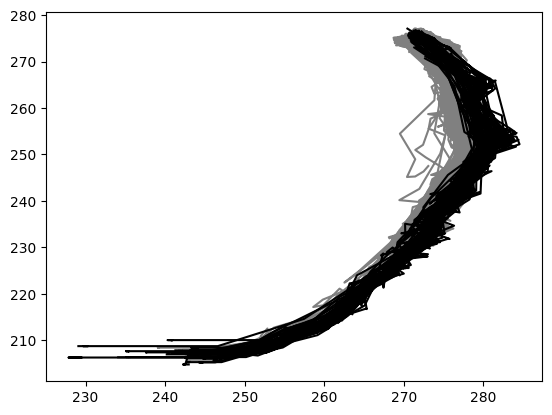

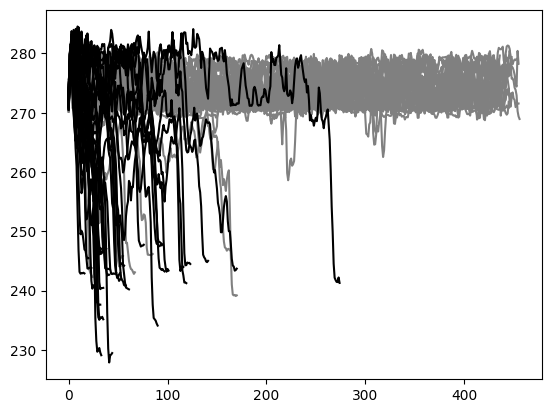

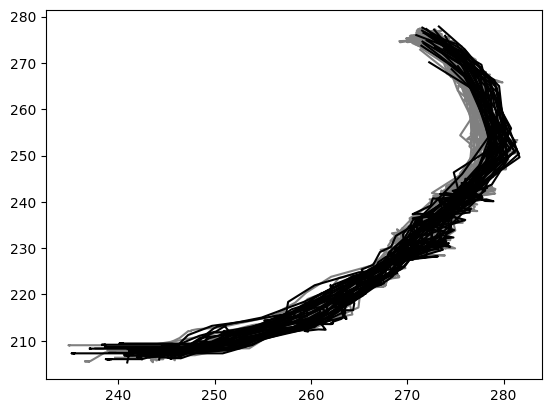

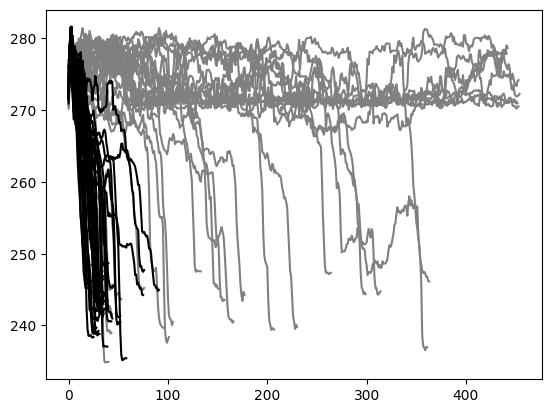

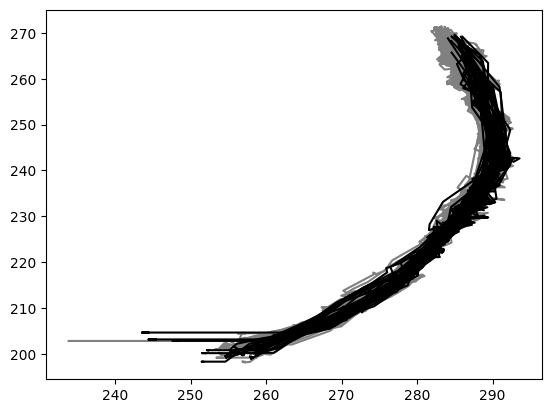

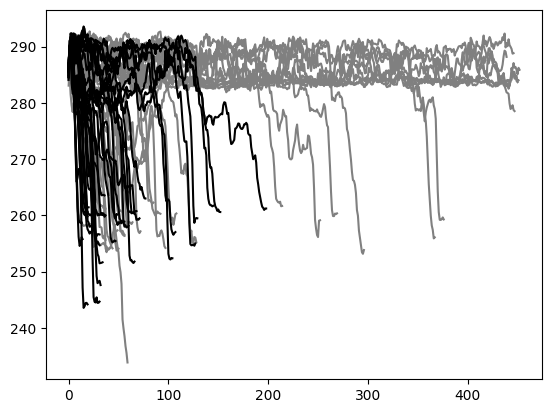

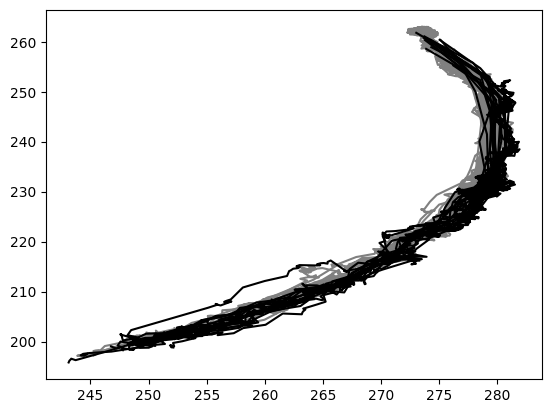

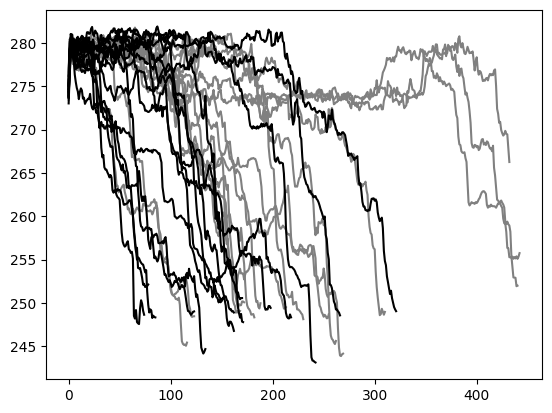

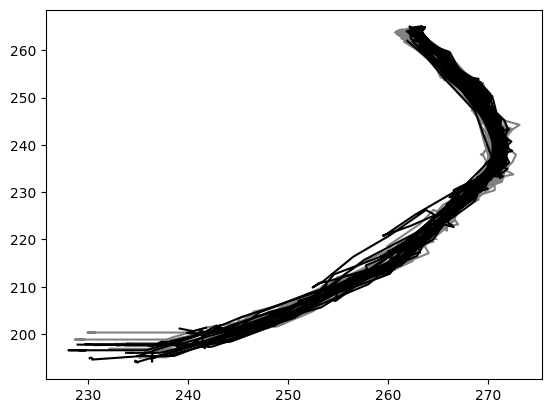

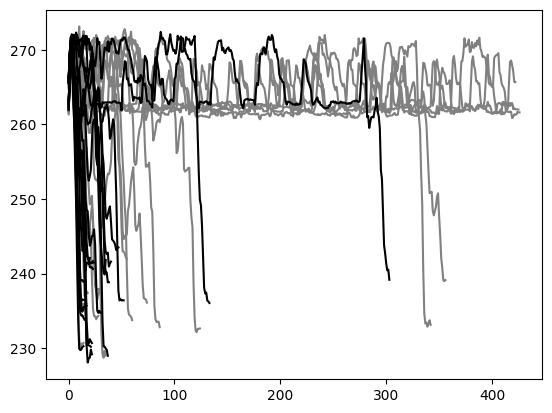

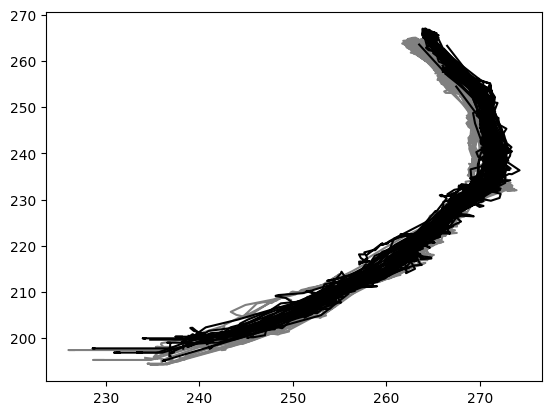

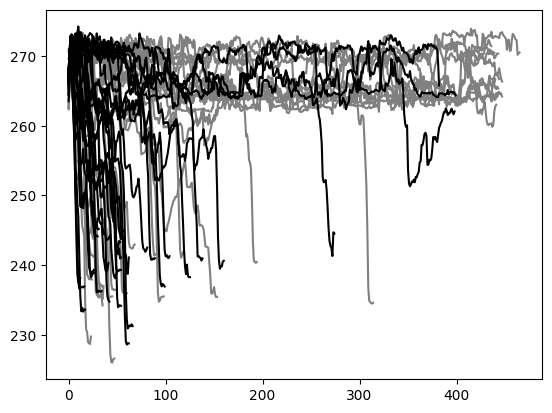

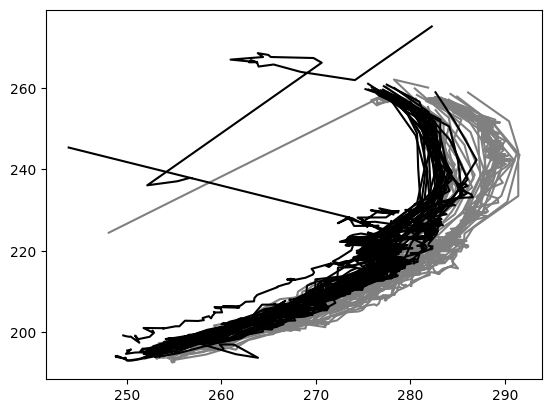

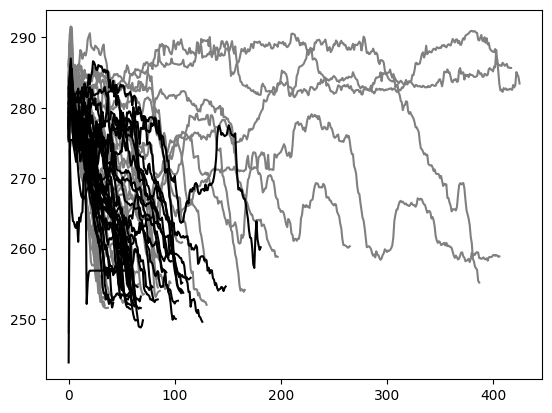

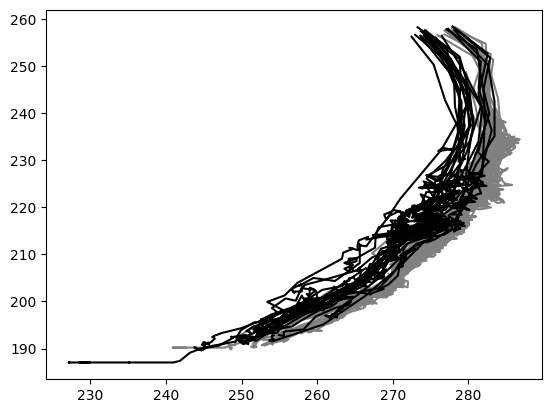

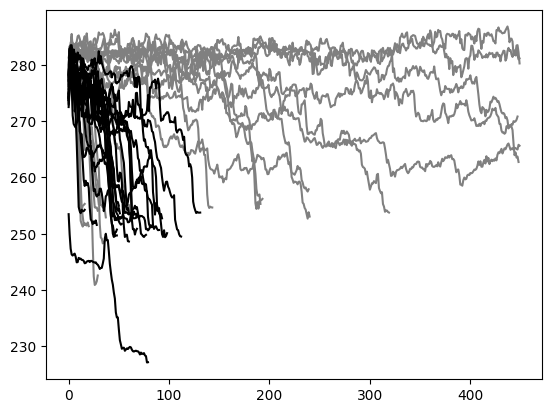

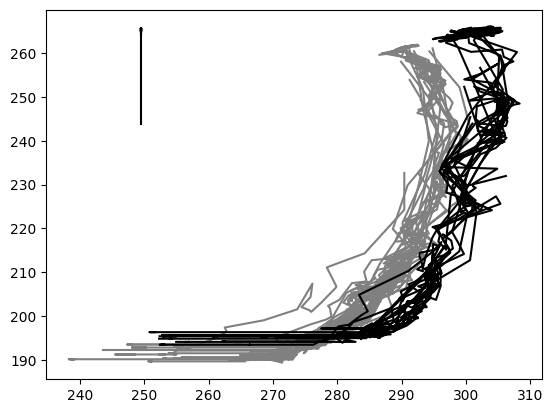

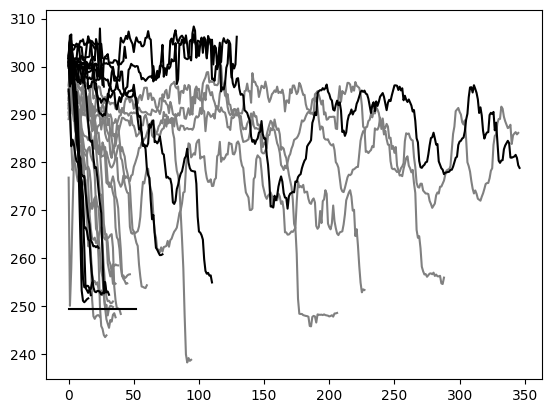

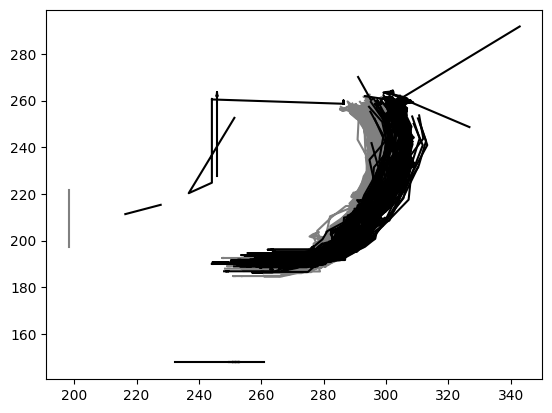

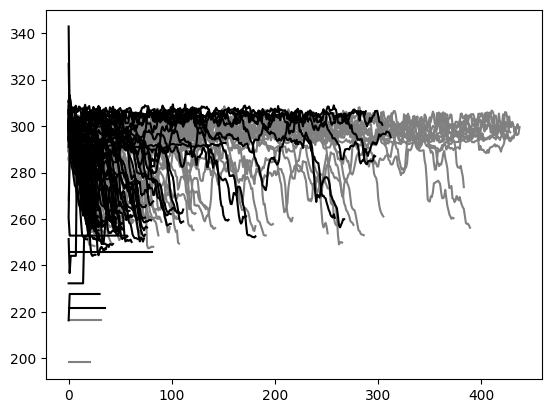

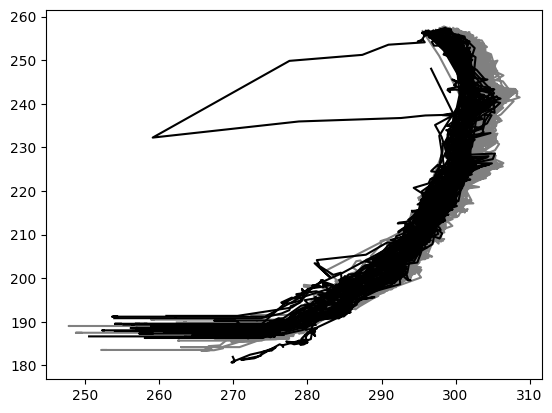

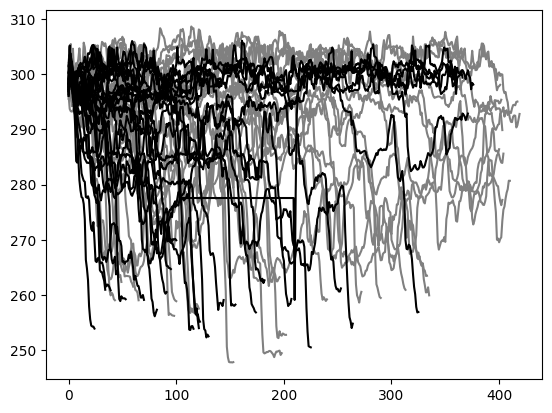

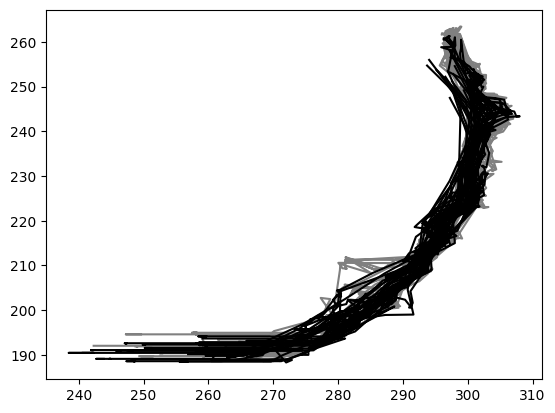

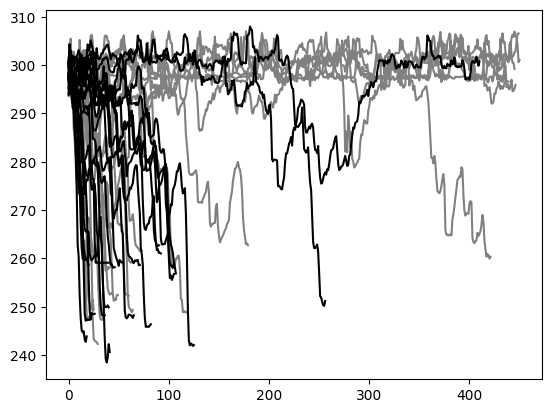

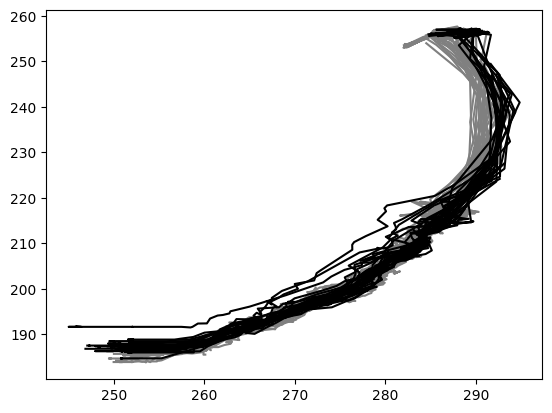

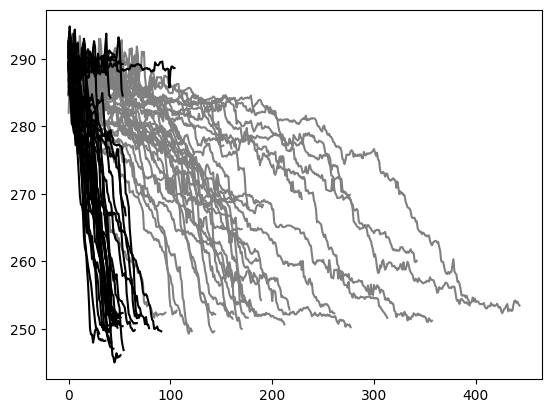

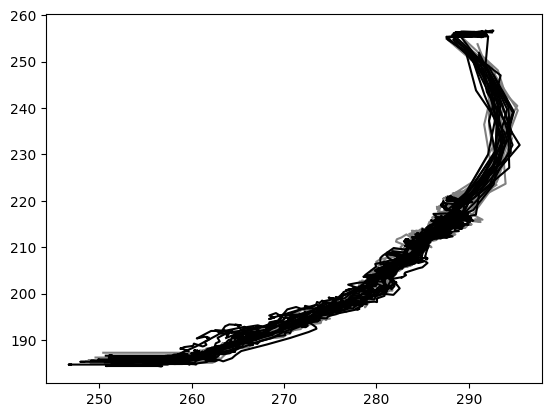

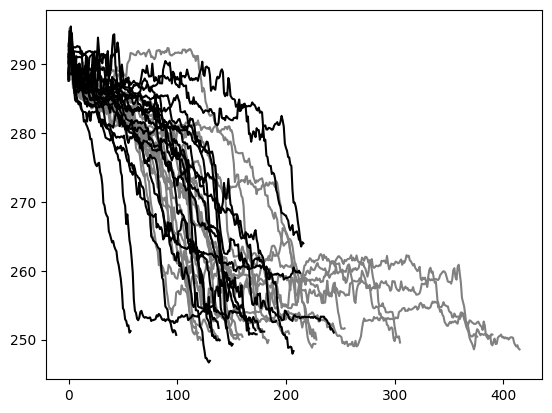

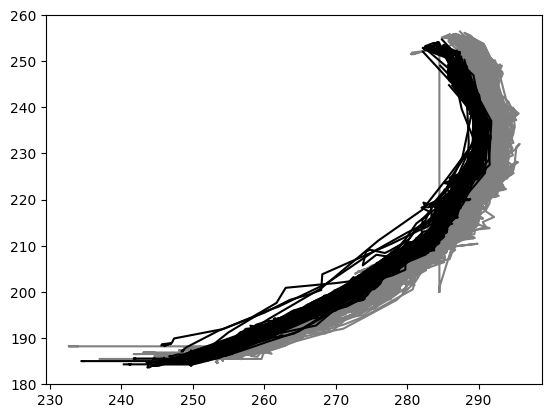

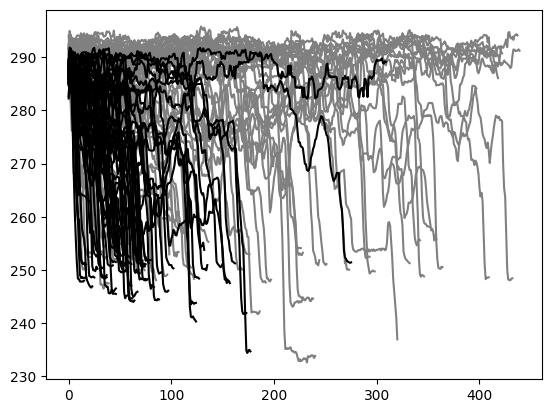

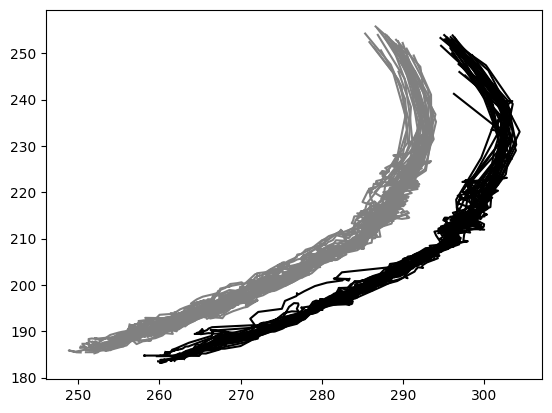

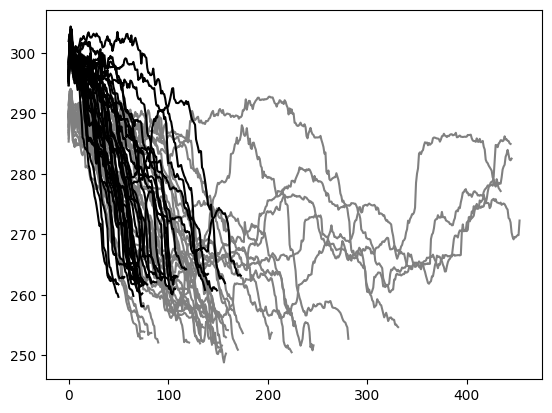

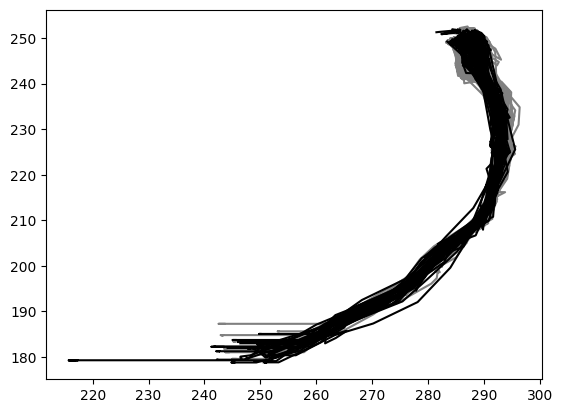

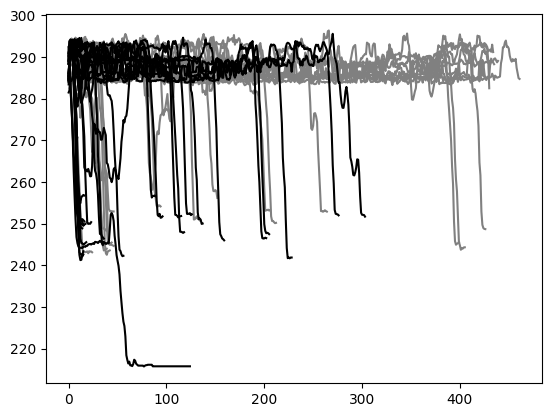

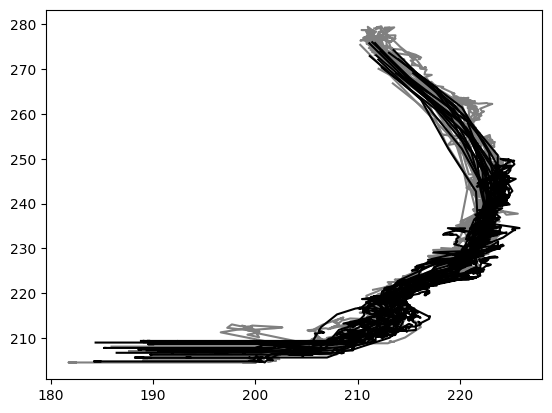

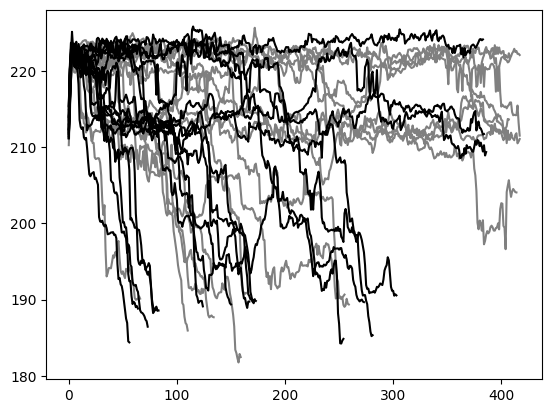

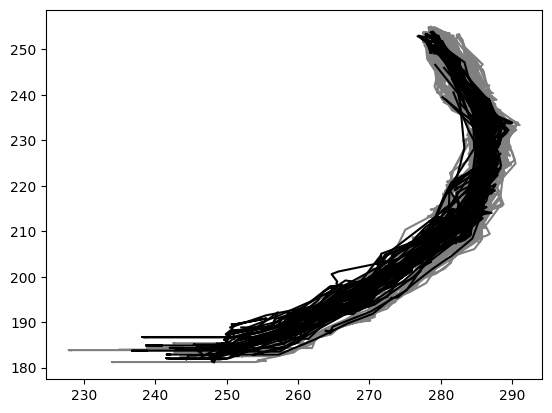

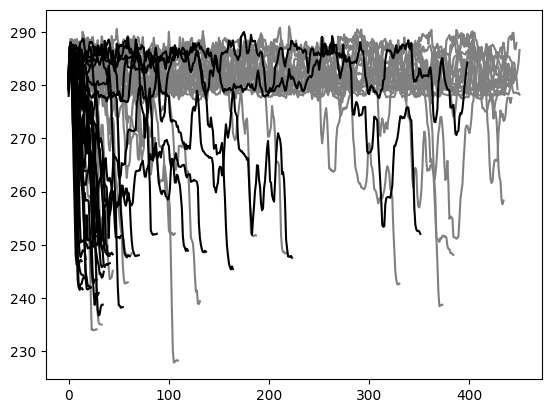

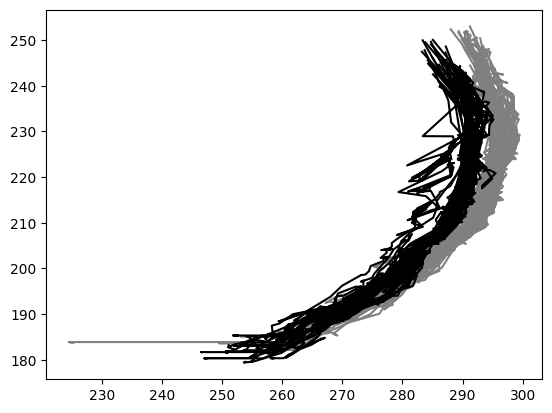

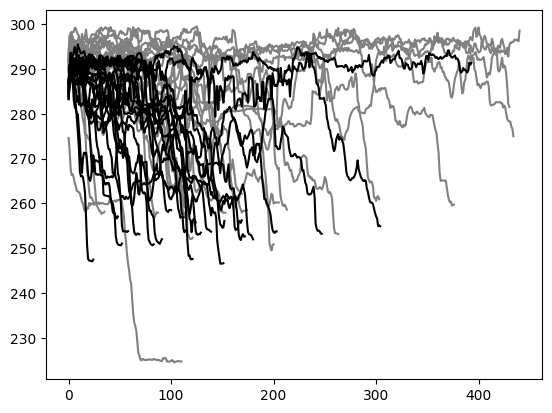

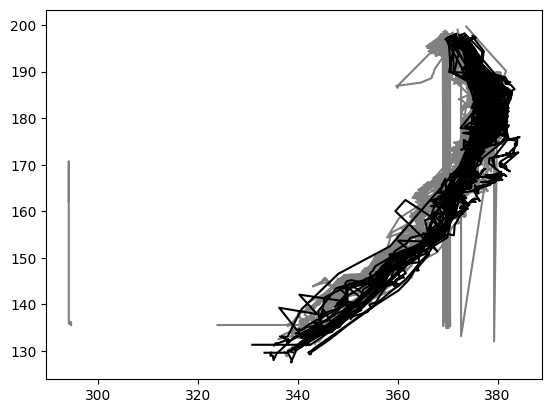

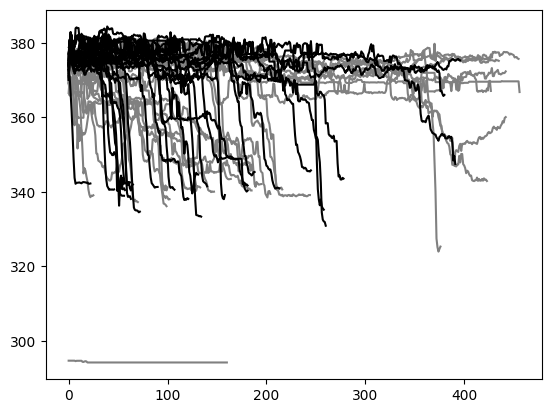

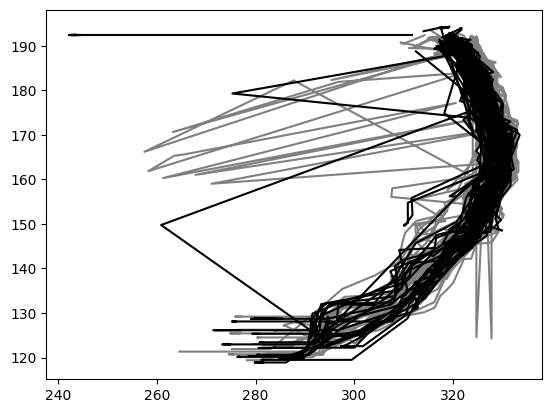

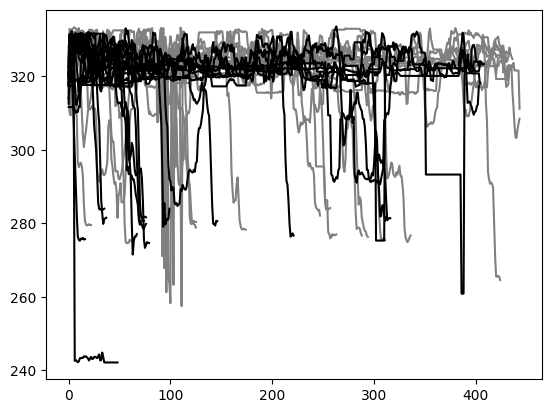

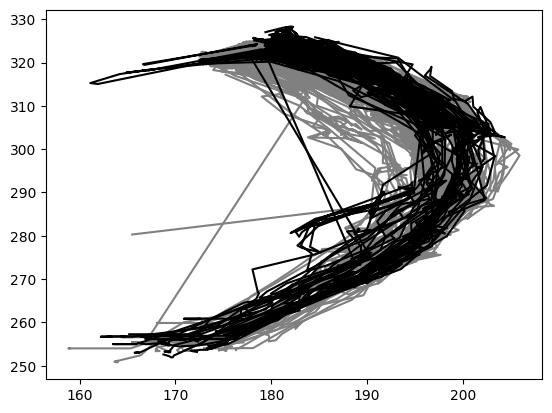

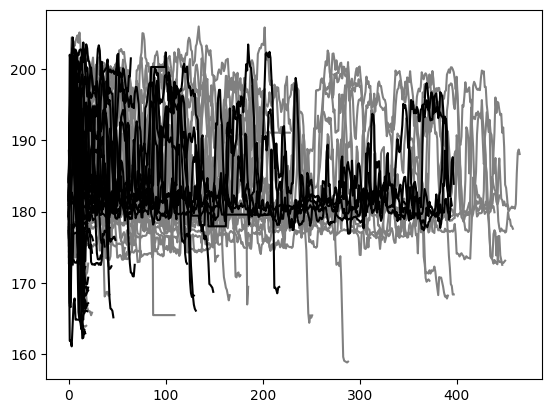

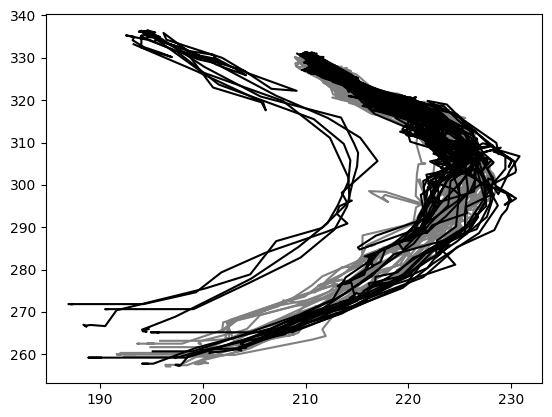

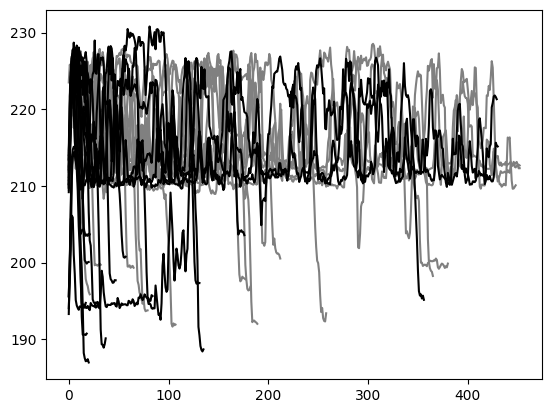

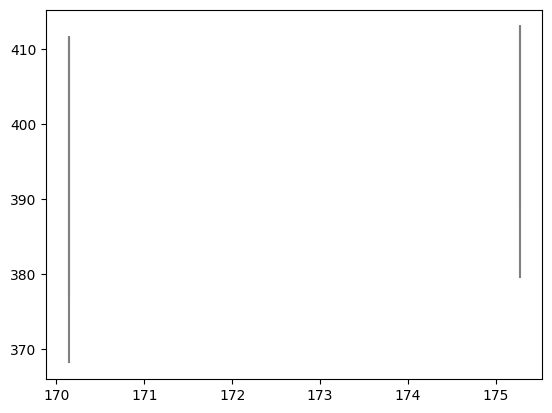

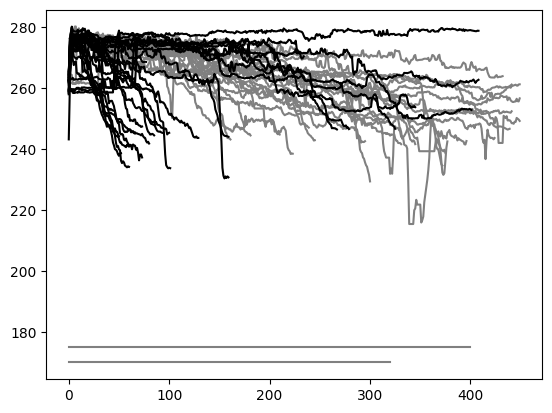

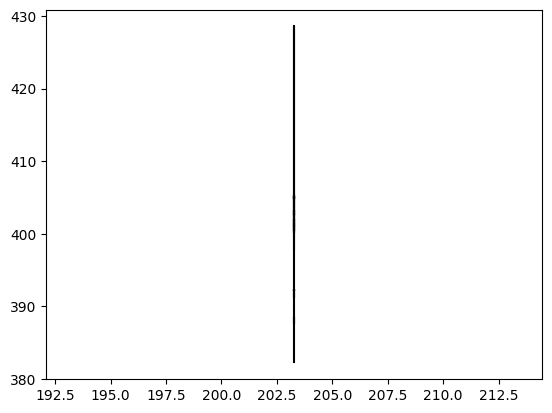

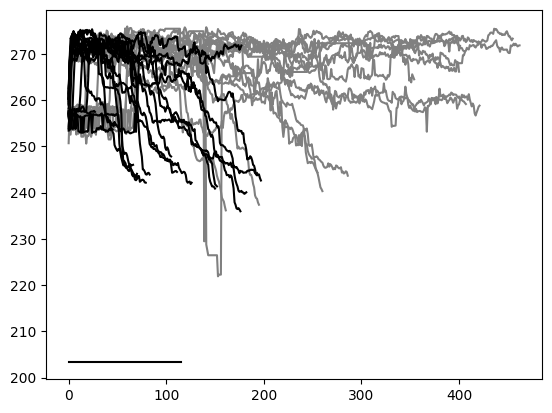

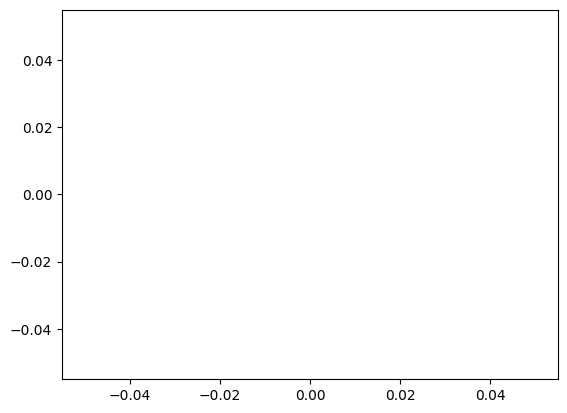

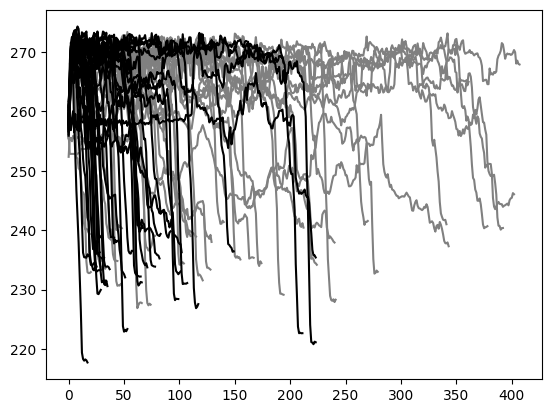

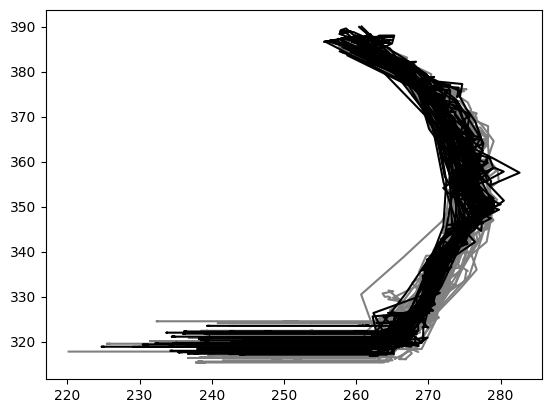

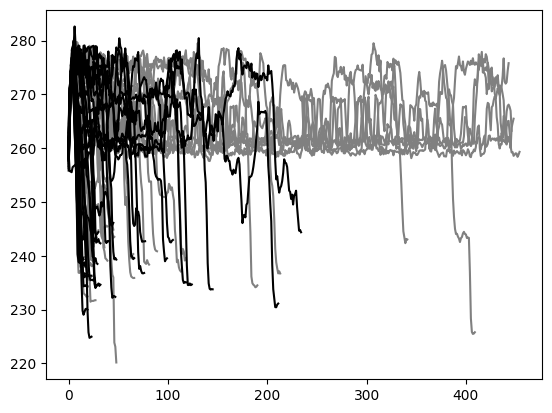

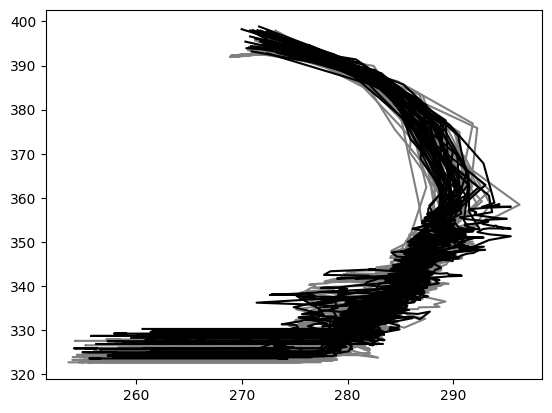

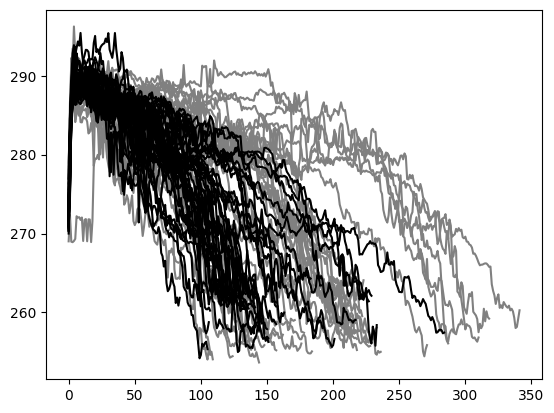

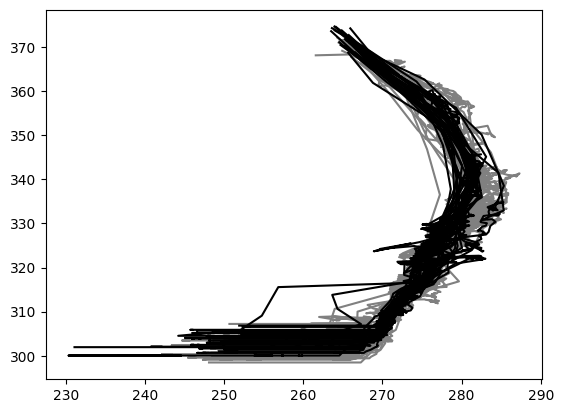

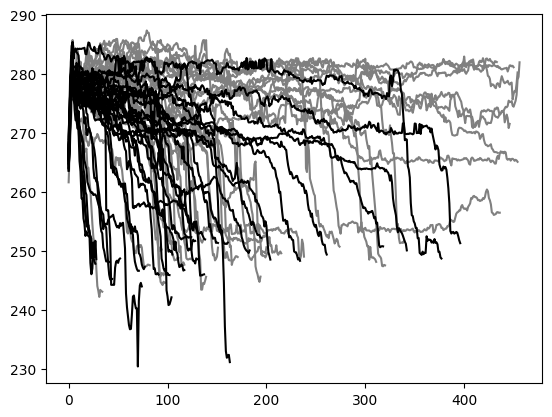

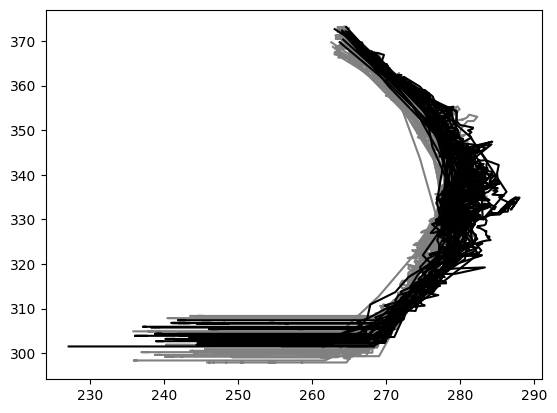

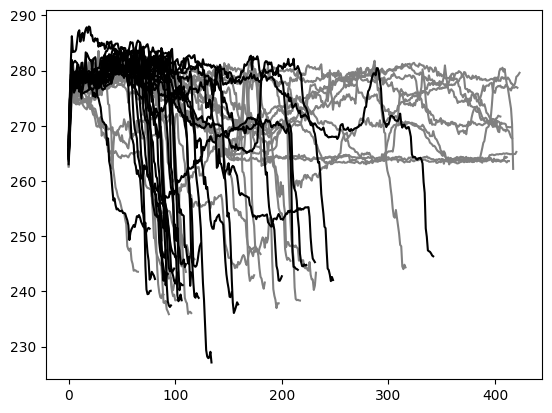

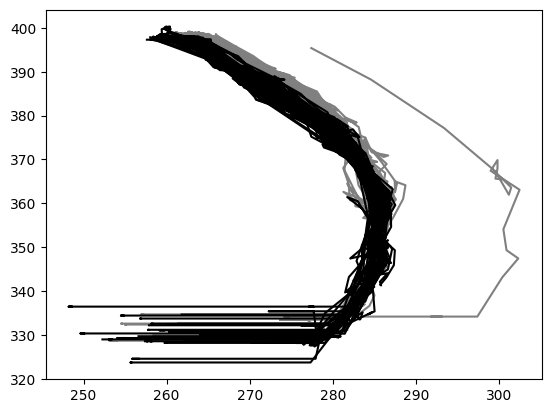

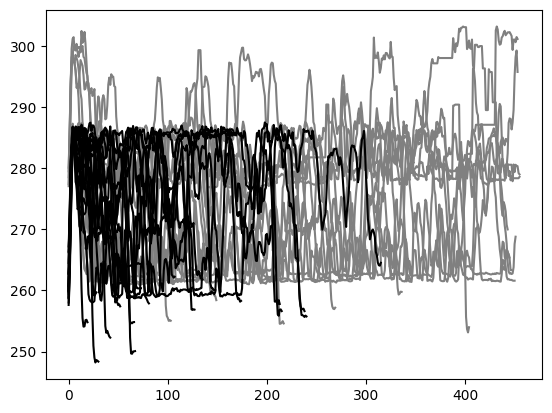

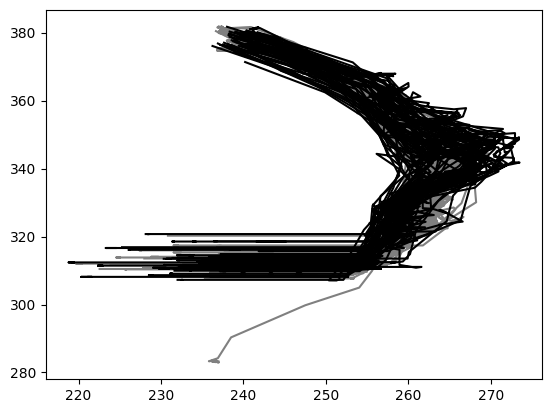

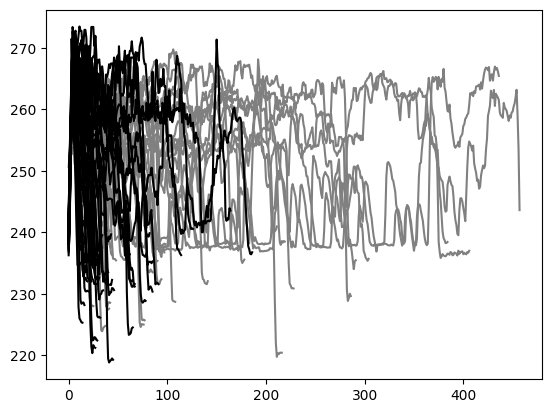

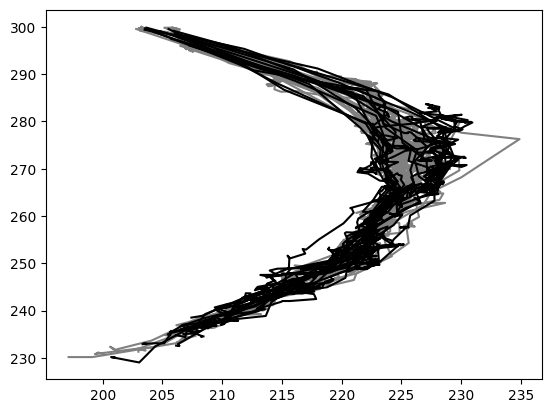

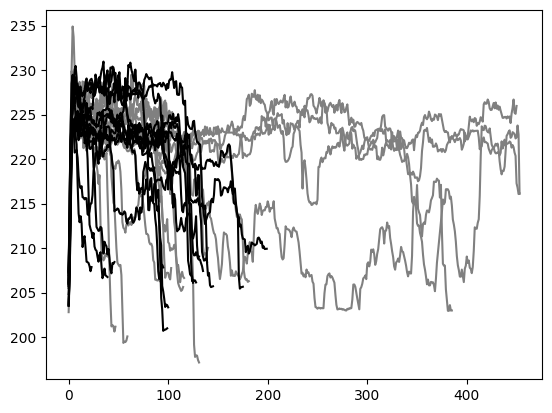

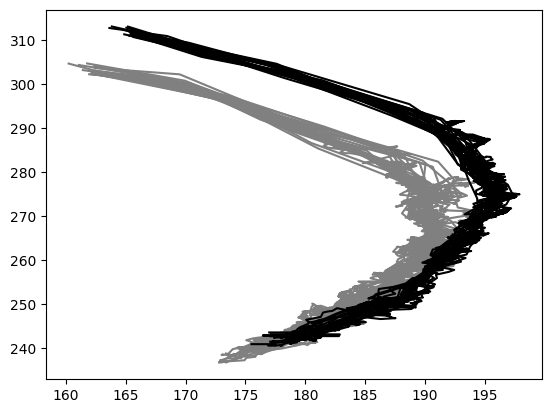

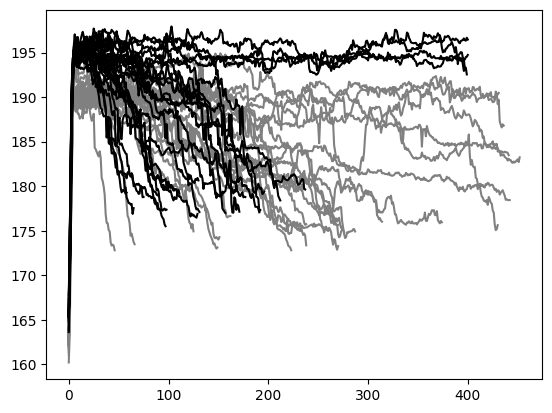

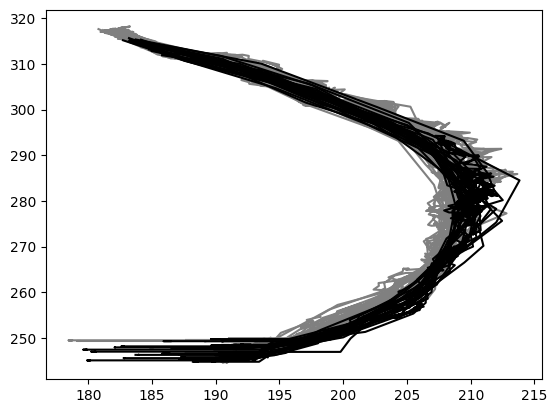

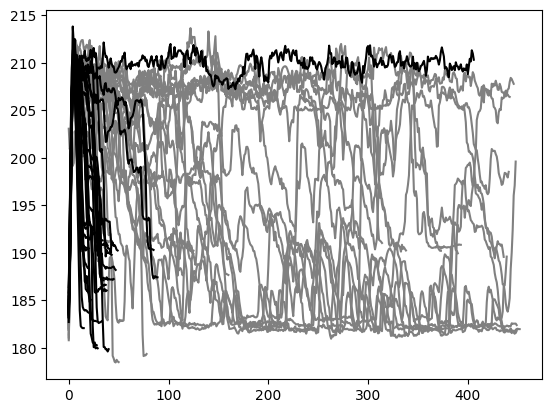

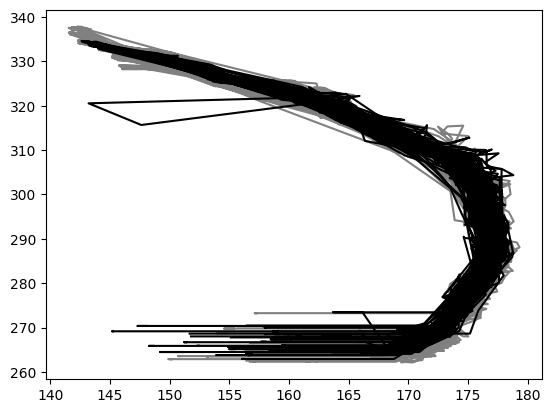

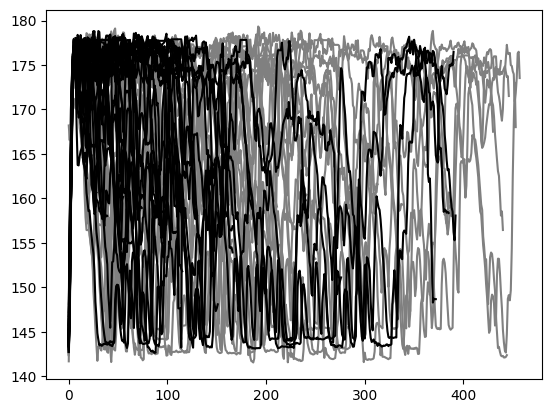

In [297]:
handedness = ['left','right','right','right','right','right','right','right',
              'right','left','right','left','right','right','right'];
session = []
%matplotlib inline
reward_all = []
onset = []
corr = []
corr_early = []
corr_late = []
vel = []
pval = []
for n,s in enumerate(sub):
    if n in range(1,15):
        list_dir = os.listdir('Z:\\Rohit\\BMI_Data\\'+ s +'\\Data\\')
#         for m,dirc in enumerate(list_dir): 
#             list_path = natsorted(os.listdir('Z:\\Rohit\\BMI_Data\\'+ s +'\\Data\\'+ list_dir[m] ))
        list_data = [data for data in list_dir if data.startswith(s)]
        for i,path in enumerate(list_data):
            read_path=('Z:\\Rohit\\BMI_Data\\'+ s +'\\Data\\'+path)
#             print(read_path)
            if i+3 in robust_session[n]:
                print(i+3)
                print(path)
                rew,ons = (read_reward(read_path))
                reward_all.append(rew)
                onset.append(ons)
                reward_frame = []
                tr_list = []
                session.append(path)
                early,late,data = read_DLC_data_sub(path)
                    
                for tr in range(len(rew[0])):
                    if tr+1 in data['tr']:
#                     if tr>tstart[n][i+2]-1 and tr<tstop[n][i+2]+1:
#                         print(tr)
                        reward_frame.append(((rew[0][tr]-ons[0][tr])/Fs))
                        tr_list.append(tr+1);

#                 print(data['tr'])
#                 print(tr_list)
                
                # match tr before plotting
#                 ind = [x for x in data['tr'] if x in tr_list]
#                 print(ind)
#                 reward_frame = [reward_frame[x-1] for x in ind]
                if data['tr']==tr_list:
                    
                    pipe_e, pipe_l, pv_e, pv_l = plot_trajectories(data,early,late,'pipe',reward_frame,True,True,False)
#                     nose_e, nose_l = plot_trajectories(data,early,late,'unicorn',reward_frame,False,False,False)[0:2]

#                     nose_e, nose_l = plot_trajectories(data,early,late,handedness[n],reward_frame,False,False,False)[0:2]
#                     print(pipe_e)
#                     pipe_e_ = get_interpolated_data(pipe_e)
#                     pipe_l_ = get_interpolated_data(pipe_l)
#                     plt.figure()
#                     pv_e_ = get_interpolated_data(pv_e)
#                     pv_l_ = get_interpolated_data(pv_l)
#                     plot_mean_and_sem(pv_e_,0)
#                     plot_mean_and_sem(pv_l_,0)
#                     plt.plot(np.transpose(pipe_e_),'gray')
#                     plt.plot(np.transpose(pipe_l_),'k')
#                     plot_mean_and_sem(pipe_e_,0)
#                     plot_mean_and_sem(pipe_l_,0)
                    plt.savefig(path+'_traj.svg', format='svg', dpi=1200)
#                     vel.append([np.nanmean(pv_e_),np.nanmean(pv_l_)])
#                     plt.show()
#                     nose_e_ = get_interpolated_data(nose_e)
#                     nose_l_ = get_interpolated_data(nose_l)
#                     print(pipe_e_.shape)
#                     print(pipe_l_.shape)

#                     plt.show()
#                     corr_e, corr_l = get_corr(pipe_e[:,0,:], pipe_l[:,0,:],nose_e[:,0,:], nose_l[:,0,:])
#                     corr_e, corr_l = get_corr(pipe_e_, pipe_l_,nose_e_, nose_l_)

#                     plt.scatter([np.zeros((0,len(corr_e))),np.ones((0,len(corr_l)))],[(corr_e),(corr_l)])
#                     plt.scatter([0,1],[np.nanmean(corr_e),np.nanmean(corr_l)])

#                     corr_e, corr_l, p_e, p_l= get_corr(pipe_e, pipe_l,nose_e, nose_l)
#                     corr.append([np.nanmean(corr_e),np.nanmean(corr_l)])
#                     pval.append([np.nanmean(p_e),np.nanmean(p_l)])
#                     corr_early.append(corr_e)
#                     corr_late.append(corr_l)
                    
                    
                    
#                     pval.append([[p_e],[p_l]])
#                     corr[n]=[np.mean(corr_e,0),np.mean(corr_l,0)]
#                 elif data['tr'][:-1]==tr_list:
#                     plot_trajectories(data,early,late,'pipe',reward_frame,True,True)
#                     plt.show()
                else:
                    print("Error! Mismatched trial numbers...")
                    print(data['tr'])
                    print(tr_list)               

In [166]:
len(nose_l_x[0])

338

In [30]:
handedness = ['left','right','right','right','right','right','right','right','right','left',
              'right','left','right','right','right'];
ip_handedness = ['right','left','left','left','left','left','left','left','left','right',
                 'left','right','left','left','left'];

session = []
%matplotlib inline
plt.ion()
reward_all = []
onset = []
corr = []
corr_early = []
corr_late = []
vel = []
pval = []
for n,s in enumerate(sub):
    if n in stroke: #range(0,13):
        list_dir = os.listdir('Z:\\Rohit\\BMI_Data\\'+ s +'\\Data\\')
#         for m,dirc in enumerate(list_dir): 
#             list_path = natsorted(os.listdir('Z:\\Rohit\\BMI_Data\\'+ s +'\\Data\\'+ list_dir[m] ))
        list_data = [data for data in list_dir if data.startswith(s)]
        print(list_data)
        for i,path in enumerate(list_data):
            read_path=('Z:\\Rohit\\BMI_Data\\'+ s +'\\Data\\'+path)
#             print(read_path)
            if i+3 in robust_session[n]:
                print(i+3)
                print(path)
                rew,ons = (read_reward(read_path))
                reward_all.append(rew)
                onset.append(ons)
                reward_frame = []
                tr_list = []
                session.append(path)
                early,late,data = read_DLC_data_sub(path)
                    
                for tr in range(len(rew[0])):
                    if tr+1 in data['tr']:
#                     if tr>tstart[n][i+2]-1 and tr<tstop[n][i+2]+1:
#                         print(tr)
                        reward_frame.append(((rew[0][tr]-ons[0][tr])/Fs))
                        tr_list.append(tr+1);

#                 print(data['tr'])
#                 print(tr_list)
                
                # match tr before plotting
#                 ind = [x for x in data['tr'] if x in tr_list]
#                 print(ind)
#                 reward_frame = [reward_frame[x-1] for x in ind]
                if data['tr']==tr_list:
                    
                    pipe_e_x, pipe_l_x, pv_e, pv_l = plot_trajectories(data,early,late,'pipe',reward_frame,True,False,False)
#                     pipe_e_y, pipe_l_y, pv_e, pv_l = plot_trajectories(data,early,late,'pipe',reward_frame,False,False,False)
#                     nose_e, nose_l = plot_trajectories(data,early,late,handedness[n],reward_frame,False,False,False)[0:2]
#                     nose_e, nose_l = plot_trajectories(data,early,late,'nose',reward_frame,True,False,False)[0:2]
#                     nose_e_x, nose_l_x = plot_trajectories(data,early,late,ip_handedness[n],reward_frame,True,False,False)[0:2]
#                     nose_e_y, nose_l_y = plot_trajectories(data,early,late,ip_handedness[n],reward_frame,False,False,False)[0:2]
                    nose_e_x, nose_l_x = plot_trajectories(data,early,late,'unicorn',reward_frame,True,False,False)[0:2]
#                     nose_e_y, nose_l_y = plot_trajectories(data,early,late,'nose',reward_frame,False,False,False)[0:2]
        
        
#                     print(pipe_e)
#                     pipe_e_ = get_interpolated_data(pipe_e)
#                     pipe_l_ = get_interpolated_data(pipe_l)

#                     pv_e_ = get_interpolated_data(pv_e)
#                     pv_l_ = get_interpolated_data(pv_l)
#                     plot_mean_and_sem(pv_e_,0)
#                     plot_mean_and_sem(pv_l_,0)
#                     vel.append([np.nanmean(pv_e_),np.nanmean(pv_l_)])
#                     plt.show()
#                     nose_e_ = get_interpolated_data(nose_e)
#                     nose_l_ = get_interpolated_data(nose_l)
#                     print(pipe_e_.shape)
#                     print(pipe_l_.shape)

#                     plt.show()
#                     corr_e, corr_l = get_corr(pipe_e[:,0,:], pipe_l[:,0,:],nose_e[:,0,:], nose_l[:,0,:])
#                     corr_e, corr_l = get_corr(pipe_e_, pipe_l_,nose_e_, nose_l_)
                    corr_e, corr_l, p_e, p_l= get_corr(pipe_e_x, pipe_l_x,nose_e_x, nose_l_x)
#                     corr_e, corr_l, p_e, p_l= get_corr(pipe_e_x, pipe_l_x,nose_e_x, nose_l_x)
                    # filter the trajectory
#                     nose_e_x = scipy.signal.savgol_filter(nose_e_x, 10,2)
#                     nose_l_x = scipy.signal.savgol_filter(nose_l_x, 10,2)
#                     nose_e_y = scipy.signal.savgol_filter(nose_e_y, 10,2)
#                     nose_l_y = scipy.signal.savgol_filter(nose_l_y, 10,2)
        
#                     pipe_e_x.extend(pipe_e_y)
#                     pipe_l_x.extend(pipe_l_y)
#                     nose_e_x.extend(nose_e_y)
#                     nose_l_x.extend(nose_l_y)
#                     corr_e, corr_l, p_e, p_l= get_corr(pipe_e_x, pipe_l_x,nose_e, nose_l)
#                     plt.scatter([np.zeros((0,len(corr_e))),np.ones((0,len(corr_l)))],[(corr_e),(corr_l)])
#                     plt.scatter([0,1],[np.nanmean(corr_e),np.nanmean(corr_l)])
                    corr.append([np.nanmean(corr_e),np.nanmean(corr_l)])
                    pval.append([np.nanmean(p_e),np.nanmean(p_l)])
                    corr_early.append(corr_e)
                    corr_late.append(corr_l)
#                     pval.append([[p_e],[p_l]])
#                     corr[n]=[np.mean(corr_e,0),np.mean(corr_l,0)]
#                 elif data['tr'][:-1]==tr_list:
#                     plot_trajectories(data,early,late,'pipe',reward_frame,True,True)
#                     plt.show()
                else:
                    print("Error! Mismatched trial numbers...")
                    print(data['tr'])
                    print(tr_list)               

['I111-220420-140505', 'I111-220421-143139', 'I111-220422-135940', 'I111-220425-143454', 'I111-220425-153734', 'I111-220426-142615', 'I111-220427-140721', 'I111-220503-144526']
3
I111-220420-140505
I111-220420-140505
(33, 2, 466)
Trial ignored!
Trial ignored!
(33, 2, 466)
Array has NaN/Inf


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


Array has NaN/Inf
4
I111-220421-143139
I111-220421-143139
(20, 2, 466)
(20, 2, 466)
8
I111-220426-142615
I111-220426-142615


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


(16, 2, 466)
(16, 2, 466)
9
I111-220427-140721
I111-220427-140721


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


(81, 2, 466)
Trial ignored!
Trial ignored!
Trial ignored!
Trial ignored!
(81, 2, 466)


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


Array has NaN/Inf
Array has NaN/Inf
Array has NaN/Inf
Array has NaN/Inf
10
I111-220503-144526
I111-220503-144526


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


(28, 2, 466)
(28, 2, 466)


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


['I112-220518-133943', 'I112-220519-144611', 'I112-220520-133714', 'I112-220523-134750', 'I112-220524-141320', 'I112-220525-134747', 'I112-220526-133954', 'I112-220527-135348']
5
I112-220520-133714
I112-220520-133714
(21, 2, 466)
(21, 2, 466)
7
I112-220524-141320


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


I112-220524-141320
(32, 2, 466)
(32, 2, 466)


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


9
I112-220526-133954
I112-220526-133954
(17, 2, 466)
(17, 2, 466)
['I127-221128-142642', 'I127-221130-140213', 'I127-221202-142328', 'I127-221205-142024', 'I127-221206-145834', 'I127-221207-125913', 'I127-221209-141729']
8
I127-221207-125913
I127-221207-125913


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


(27, 2, 466)
(27, 2, 466)


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


['I128-230127-150013', 'I128-230130-152054', 'I128-230131-150818', 'I128-230202-144022']
3
I128-230127-150013
I128-230127-150013
(20, 2, 466)
(20, 2, 466)
6
I128-230202-144022


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


I128-230202-144022
(35, 2, 466)
(35, 2, 466)


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


['I154-230705-144321', 'I154-230706-145820', 'I154-230707-141347', 'I154-230710-141918', 'I154-230710-150759', 'I154-230711-141255', 'I154-230712-142552', 'I154-230714-141335', 'I154-230717-142203', 'I154-230718-144222', 'I154-230720-143613', 'I154-230721-153714', 'I154-230725-145049', 'I154-230726-105352', 'I154-230726-143043', 'I154-230727-151120', 'I154-230728-105031', 'I154-230728-151933', 'I154-230801-111750', 'I154-230801-143816', 'I154-230802-113228']
8
I154-230711-141255
I154-230711-141255
(16, 2, 466)
(16, 2, 466)
14
I154-230721-153714
I154-230721-153714


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


(24, 2, 466)
(24, 2, 466)
16
I154-230726-105352


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


I154-230726-105352
(19, 2, 466)
(19, 2, 466)
18
I154-230727-151120
I154-230727-151120


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


(36, 2, 466)
(36, 2, 466)


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


['I160-231031-150837', 'I160-231101-144754', 'I160-231102-152033', 'I160-231106-143409', 'I160-231107-145000', 'I160-231108-142501', 'I160-231117-141759', 'I160-231120-141708', 'I160-231121-111022', 'I160-231121-144512', 'I160-231129-150742', 'I160-231130-111651', 'I160-231130-151259', 'I160-231201-112628']
7
I160-231107-145000
I160-231107-145000
(32, 2, 466)
(32, 2, 466)


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


9
I160-231117-141759
I160-231117-141759
(40, 2, 466)
(40, 2, 466)


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


11
I160-231121-111022
I160-231121-111022
(31, 2, 466)
(31, 2, 466)


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


14
I160-231130-111651
I160-231130-111651
(26, 2, 466)
(26, 2, 466)
['I161-240205-153858', 'I161-240206-142604', 'I161-240207-142655', 'I161-240208-143700', 'I161-240212-144150', 'I161-240213-144834', 'I161-240214-143022', 'I161-240215-152014', 'I161-240219-145157', 'I161-240227-152405', 'I161-240229-142140']
8
I161-240213-144834


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue


I161-240213-144834
(19, 2, 466)
(19, 2, 466)
9
I161-240214-143022
I161-240214-143022


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


(47, 2, 466)
(47, 2, 466)


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


['I170-240312-105148', 'I170-240313-141928', 'I170-240314-140334', 'I170-240318-132021', 'I170-240319-143612', 'I170-240320-144202', 'I170-240325-143330', 'I170-240326-145607', 'I170-240327-143638', 'I170-240328-144117']
9
I170-240325-143330
I170-240325-143330
(14, 2, 466)
(14, 2, 466)
['I172-240513-135212', 'I172-240514-141955', 'I172-240515-132923', 'I172-240516-135510', 'I172-240520-134236', 'I172-240521-134541']
4
I172-240514-141955
I172-240514-141955


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarnin

(25, 2, 466)
(25, 2, 466)


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


5
I172-240515-132923
I172-240515-132923
(26, 2, 466)
(26, 2, 466)
7
I172-240520-134236


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:35: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_l[n] = scipy.stats.pearsonr(l1[n],l2[n]).pvalue


I172-240520-134236
(33, 2, 466)
(33, 2, 466)


C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).statistic
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:21: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  p_e[n] = scipy.stats.pearsonr(e1[n],e2[n]).pvalue
C:\Users\Tanuj\AppData\Local\Temp\ipykernel_68956\848338014.py:34: NearConstantInputWarnin

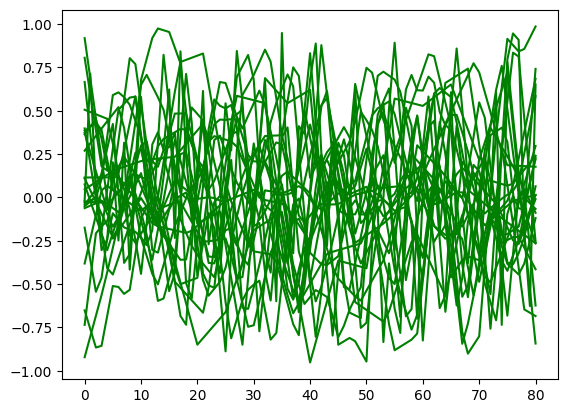

In [28]:
for i in range(len(np.array(get_interpolated_data(corr_early)))):
    if (np.array(get_interpolated_data(corr_early)[i] <= 1 ).all()):
#         print(i)
        plt.plot(get_interpolated_data(corr_early)[i],'g')

# (np.array(get_interpolated_data(corr_early)[5]) < 1).all()

(-1.0, 1.0)

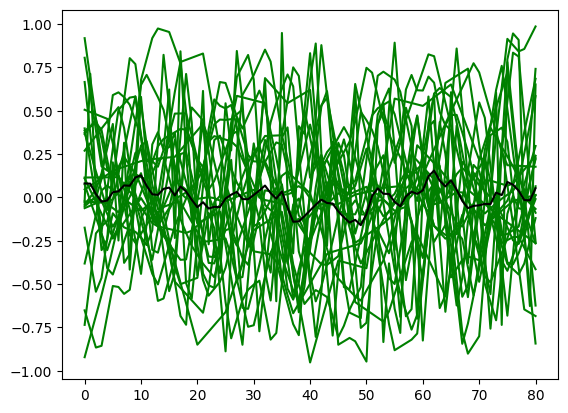

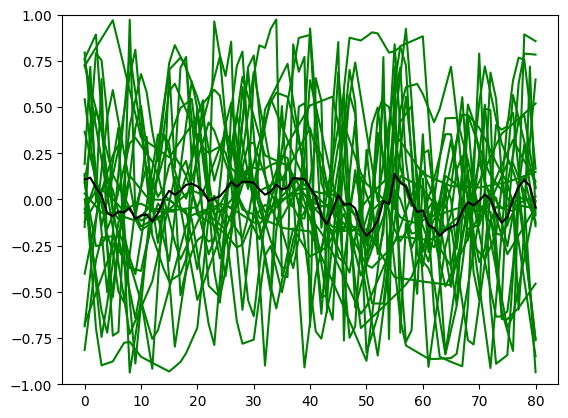

In [27]:
corr_early

early_cleaned = []
late_cleaned = []
# plt.plot(get_interpolated_data(corr_early),'g')
for i in range(len(np.array(get_interpolated_data(corr_early)))):
    if (np.array(get_interpolated_data(corr_early)[i] <= 1 ).all()):
#         print(i)
        early_cleaned.append(get_interpolated_data(corr_early)[i])
        plt.plot(get_interpolated_data(corr_early)[i],'g')
plt.plot(np.nanmean(early_cleaned,0),'k')
# plt.ylim([-1,1])
# # plt.savefig('Corr_early_intact_pipe_nose.svg', format='svg', dpi=1200)
plt.figure()
# plt.plot(get_interpolated_data(corr_late),'g')
for i in range(len(np.array(get_interpolated_data(corr_late)))):
    if (np.array(get_interpolated_data(corr_late)[i] <= 1 ).all()):
#         print(i)
        late_cleaned.append(get_interpolated_data(corr_late)[i])
        plt.plot(get_interpolated_data(corr_late)[i],'g')
plt.plot(np.nanmean(late_cleaned,0),'k')
plt.ylim([-1,1])
# plt.savefig('Corr_late_intact_pipe_nose.svg', format='svg', dpi=1200)

TtestResult(statistic=0.02597453963577768, pvalue=0.9795016994254212, df=23)

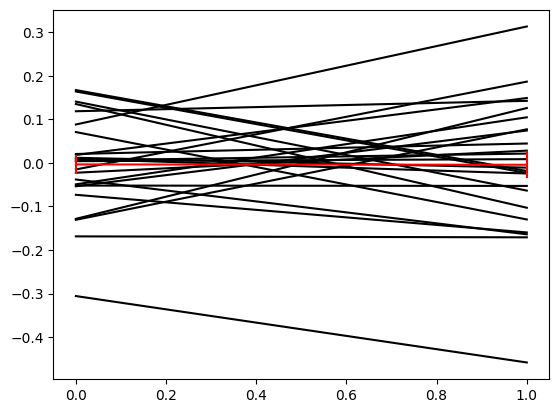

In [26]:
from scipy import stats

corr_b = corr
corr = np.array(corr)
# print(corr)
idx = np.bitwise_and( corr[:,0]<=1 , corr[:,1]<=1)
corr = corr[idx,:]
# corr_  = corr[~np.isnan(corr).any(axis=1), :]
# print(corr_)

plt.plot([np.zeros(len(corr)),np.ones(len(corr))],[corr[:,0],corr[:,1]],'k')
# plt.scatter([np.zeros(len(corr)),np.ones(len(corr))],[corr[:,0],corr[:,1]])
# plt.bar([0,1],[np.nanmean(corr[:,0]),np.nanmean(corr[:,1])],color='gray')
plt.errorbar([0,1],[np.nanmean(corr[:,0]),np.nanmean(corr[:,1])],
             yerr=np.abs([np.nanstd(corr[:,0])/np.sqrt(len(corr)),
                          np.nanstd(corr[:,1])/np.sqrt(len(corr))]),
             color='red')
stats.ttest_rel((corr[:,0]),(corr[:,1]),nan_policy='omit')
# plt.ylim([-0.4,1])
# stats.ttest_rel((corr_[:,0]),(corr_[:,1]),nan_policy='omit')
# plt.savefig('Corr_early_vs_late_intact_pipe_nose.svg', format='svg', dpi=1200)

TtestResult(statistic=-2.27738259112134, pvalue=0.03238165829191473, df=23)
I111-220426-142615
1
24


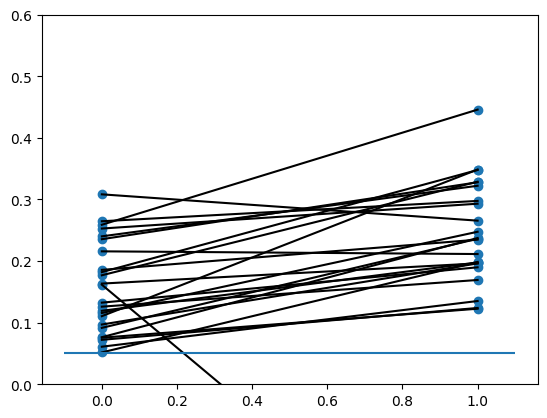

In [29]:
## pval_b = pval
pval = np.array(pval)

idx = np.bitwise_and( pval[:,0]<1 , pval[:,1]<1)
pval = pval[idx,:]
# corr_  = corr[~np.isnan(corr).any(axis=1), :]

# print(corr_)
# idx = pval>0.05
plt.plot([np.zeros(len(pval)),np.ones(len(pval))],[pval[:,0],pval[:,1]],'k')
plt.scatter([np.zeros(len(pval)),np.ones(len(pval))],[pval[:,0],pval[:,1]])
plt.hlines(0.05,-0.1,1.1)
plt.ylim([0,0.6])
print(stats.ttest_rel((pval[:,0]),(pval[:,1]),nan_policy='omit'))


count = 0
for i in range(len(pval)):
    if pval[i,1] < 0.05:
        print(session[i])
        count = count + 1
# print(idx.shape)
print(count)
print(len(pval))
# plt.savefig('Corr_early_vs_late_pVal_intact_pipe_nose.svg', format='svg', dpi=1200)

In [321]:
vel=vel_b

TtestResult(statistic=-5.087007030409588, pvalue=4.8819593778089355e-05, df=21)

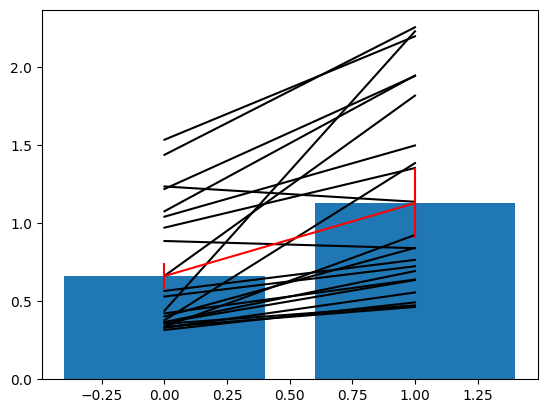

In [329]:
## Get and plot velocity or speed for all session across animals 

from scipy import stats

vel_b = vel
vel = np.array(vel)
vel =np.abs(vel)

plt.plot([np.zeros(len(vel)),np.ones(len(vel))],[vel[:,0],vel[:,1]],'k')
plt.bar([0,1],[np.nanmean(vel[:,0]),np.nanmean(vel[:,1])])
plt.errorbar([0,1],[np.nanmean(vel[:,0]),np.nanmean(vel[:,1])],yerr=np.abs([np.nanstd(vel[:,0])/np.sqrt(len(vel)),
                                                                            np.nanmean(vel[:,1])/np.sqrt(len(vel))]), 
             color='red')
plt.savefig('Speed_early_vs_late_stroke.svg', format='svg', dpi=1200)
stats.ttest_rel((vel[:,0]),(vel[:,1]),nan_policy='omit')
# stats.ttest_rel((corr_[:,0]),(corr_[:,1]),nan_policy='omit')


In [319]:
np.nanmean(vel[:,0]),np.nanmean(vel[:,1])



(0.625638605620154, 1.3491912121607947)

In [ ]:
# Plot raw early va late trajectories
early,late = read_DLC_data(5)
pipe_e = early['pipe']
pipe_l = late['pipe']

pipe_e = np.array(pipe_e)
pipe_l = np.array(pipe_l)
pipe_e = pipe_e.astype('float')
pipe_l = pipe_l.astype('float')


nose_e = early['nose']
nose_l = late['nose']

nose_e = np.array(nose_e)
nose_l = np.array(nose_l)
nose_e = nose_e.astype('float')
nose_l = nose_l.astype('float')


left_e = early['left']
left_l = late['left']

left_e = np.array(left_e)
left_l = np.array(left_l)
left_e = left_e.astype('float')
left_l = left_l.astype('float')


right_e = early['right']
right_l = late['right']

right_e = np.array(right_e)
right_l = np.array(right_l)
right_e = right_e.astype('float')
right_l = right_l.astype('float')

    
# early = scipy.signal.medfilt(early, kernel_size=None)
# late = scipy.signal.medfilt(late, kernel_size=None)

ind,early_g = get_start_ind(pipe_e[:,0,:])
ind,late_g = get_start_ind(pipe_l[:,0,:])

for n in range(len(early_g)):
    plt.plot(np.transpose(early_g[n]),'gray')
    plt.plot(np.transpose(late_g[n]),'black')
#     plt.ylim(200,300)

plt.figure()
for n in range(len(nose_e)):   
    plt.plot(np.transpose(nose_e[n,1,ind[n]:]),'gray')
    plt.plot(np.transpose(nose_l[n,1,ind[n]:]),'black')    
    
plt.figure()
for n in range(len(left_e)):   
    plt.plot(np.transpose(left_e[n,1,ind[n]:]),'gray')
    plt.plot(np.transpose(left_l[n,1,ind[n]:]),'black')    
    
plt.figure()
for n in range(len(right_e)):   
    plt.plot(np.transpose(right_e[n,1,ind[n]:]),'gray')
    plt.plot(np.transpose(right_l[n,1,ind[n]:]),'black')   

In [ ]:
import scipy

early = np.array(early)
# early = np.diff
late = np.array(late)
# early = scipy.signal.medfilt(early, kernel_size=None)
# late = scipy.signal.medfilt(late, kernel_size=None)
X = (np.gradient(early[0,1,:]))
ind = [i for i in range(len(X)) if abs(X[i])>2]
early_g = early[:,1,ind[0]:]
plt.plot(np.transpose(early_g))
# plt.ylim(170,260)
# plt.xlim(0,180)
plt.figure()
X = (np.gradient(late[0,1,:]))
ind = [i for i in range(len(X)) if abs(X[i])>2]
late_g  = late[:,1,ind[0]:]
plt.plot(np.transpose(late_g))
# plt.ylim(170,260)

In [251]:
import scipy

def plot_mean_and_sem(array, axis=0):
    mean = array.mean(axis=axis)

#     X = (np.gradient(mean))
#     ind = [i for i in range(len(X)) if abs(X[i])>3]
#     print(ind)
#     mean = mean[ind[0]:]
#     array = array[:,ind[0]:]
    sem_plus = mean + scipy.stats.sem(array, axis=axis)
    sem_minus = mean - scipy.stats.sem(array, axis=axis)
    
    plt.fill_between(np.arange(mean.shape[0]), sem_plus, sem_minus, alpha=0.5)
    plt.plot(mean)
    
    
early_1 = np.array(early_g)
late_1 = np.array(late_g)
plot_mean_and_sem(early_1)
plot_mean_and_sem(late_1)  

NameError: name 'early_g' is not defined